In [181]:
# Import libraries

# Data analysis
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocesing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# Classifier libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

!pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Encoder
!pip install category_encoders
import category_encoders as ce

# To ignore warnings
import warnings 
warnings.filterwarnings('ignore')

In [182]:
# Load dataset
df = pd.read_csv(r"C:\Users\GANIYU LATEEF GBADEB\Downloads\bank.csv")

# Display dataset
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#### Data dictionary
- Age: This refers to the age of the customer who holds the bank account.
- Job: This feature indicates the type of job that the customer has.
- Marital: This feature indicates the marital status of the customer, which could be "married," "divorced," or "single".
- Education: This refers to the education level of the customer, which could be "primary," "secondary," or "tertiary."
- Default: This feature indicates whether the customer has previously defaulted on a loan or credit card payment, which could be "yes" or "no.“
- Balance: This feature represents the current balance in the customer's account.
- Housing: This feature indicates whether the customer has a housing loan or not, which could be "yes" or "no."
- Loan: This feature indicates whether the customer has a personal loan or not, which could be "yes" or "no."
- Contact: This feature indicates the method of contact used to reach out to the customer, which could be "cellular,"     "telephone," or "unknown.“
- Day: This feature represents the day of the month when the customer was last contacted.
- Month: This feature represents the month of the year when the customer was last contacted.
- Duration: This feature represents the duration of the last contact with the customer, in seconds.
- Campaign: This feature represents the number of contacts made to the customer during this campaign.
- Pdays: This feature represents the number of days that passed by after the customer was last contacted from a previous campaign.
- Previous: This feature represents the number of contacts made to the customer before this campaign.
- Poutcome: This feature indicates the outcome of the previous marketing campaign, which could be "success," "failure," or "unknown."
- Deposit: This feature indicates whether the customer has made a deposit, which could be "yes" or "no."

In [183]:
# Data columns

df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [184]:
# Data verification

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [185]:
# Statistical analysis

df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [186]:
# Categorical statistical analysis

df.describe(include =['object','bool'])

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [187]:
# Dimensionality of the data

df.shape

(45211, 17)

## Exploratory Data Analysis

#### Univariate Analysis

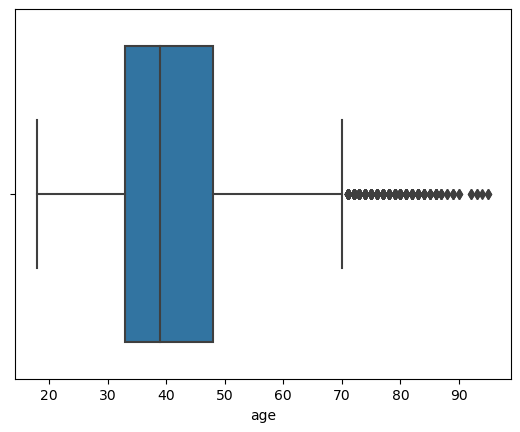

In [188]:
# Check for outliers

sns.boxplot(x=df['age']);

- I observed the presence of outliers in the age column. They are the age after the maximum which is around 70

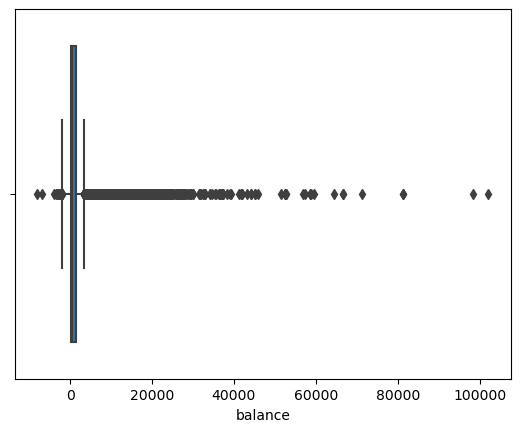

In [189]:
sns.boxplot(x=df['balance']);

- I observed the presence of positive and negative outlier in the balance which is possible because some customer's account with loans will be on negative while those without loan and wealthy can have over 100,000 in the balance

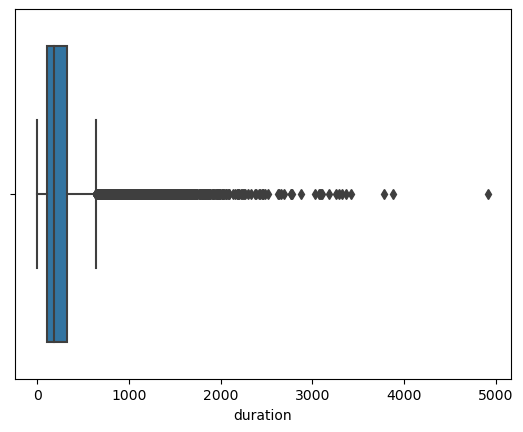

In [190]:
sns.boxplot(x=df['duration']);

- I observed the presence of outlier in the duration, meaning some customers used about 5000 seconds during thier last contact.

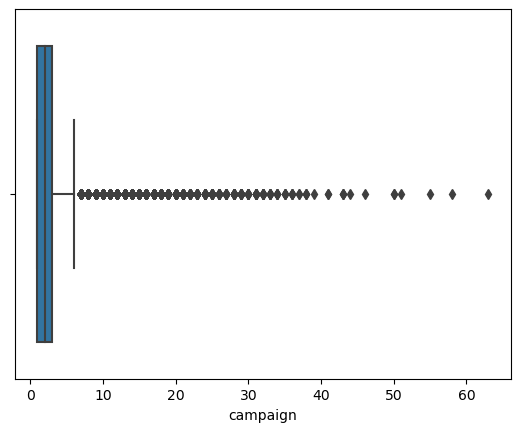

In [191]:
sns.boxplot(x=df['campaign']);

- I observed the presence of outliers in the camapign. Alo I can conclude that some custormers were contacted many times during the campaign. 

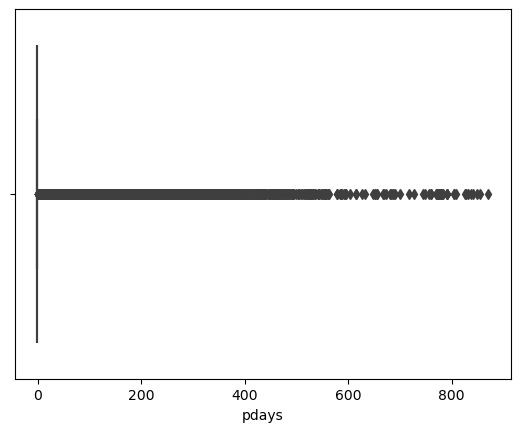

In [192]:
sns.boxplot(x=df['pdays']);

- There are outliers which indicates it took very long days to contact custormers from the last campaign 

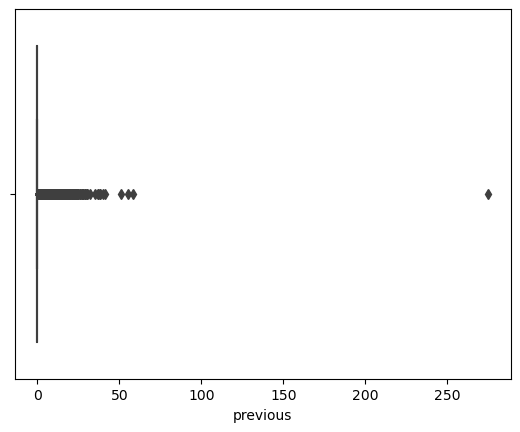

In [193]:
sns.boxplot(x=df['previous']);

- I observed outliers in previous and can conclude that there are continous contact for days during this campaign.

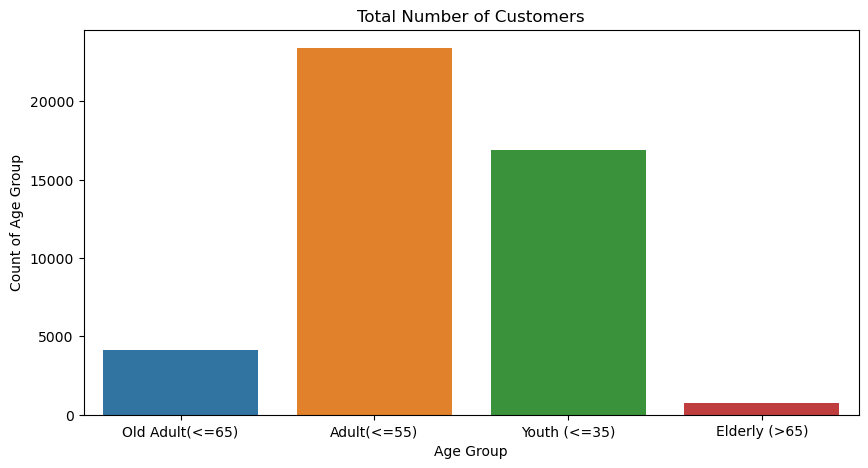

In [194]:
# Data Visualization

# Age_bracket
def age_bracket(age):
    if age <= 35:
        return 'Youth (<=35)'
    elif age <= 55:
        return 'Adult(<=55)'
    elif age <= 65:
        return 'Old Adult(<=65)'
    else:
        return 'Elderly (>65)'

df['age_bracket']=df['age'].apply(age_bracket)

# Investigating the age group of patients
plt.figure(figsize =(10,5))
sns.countplot(x='age_bracket', data=df)
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total Number of Customers');


- The age of the customers is segregated into brackets. I can observe that the number of customers in each Age group are of descending order; Adult (<= 55), Youth(<=35), Old Adult(<=65) and Elderly(>65).

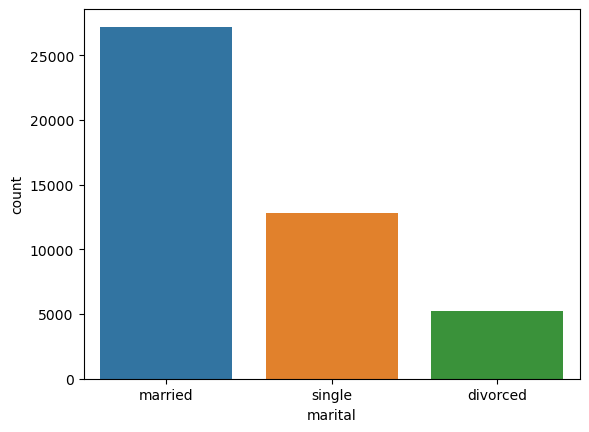

In [195]:
sns.countplot(x='marital', data=df);

- I observed that from the visualization of marital column of the data, the bank has highest count of married customers followed by single and divorced 

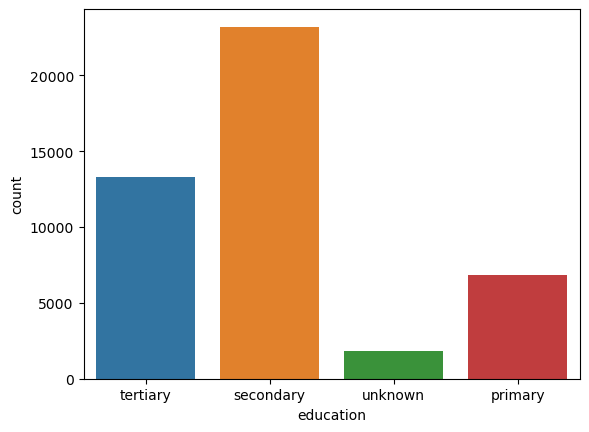

In [196]:
sns.countplot(x='education', data=df);



- I observed that customers with secondary education level are of the highest count over 20000, followed by tertiary between 13000 - 14000 count while there's less than 5000 customers with unknown education level.

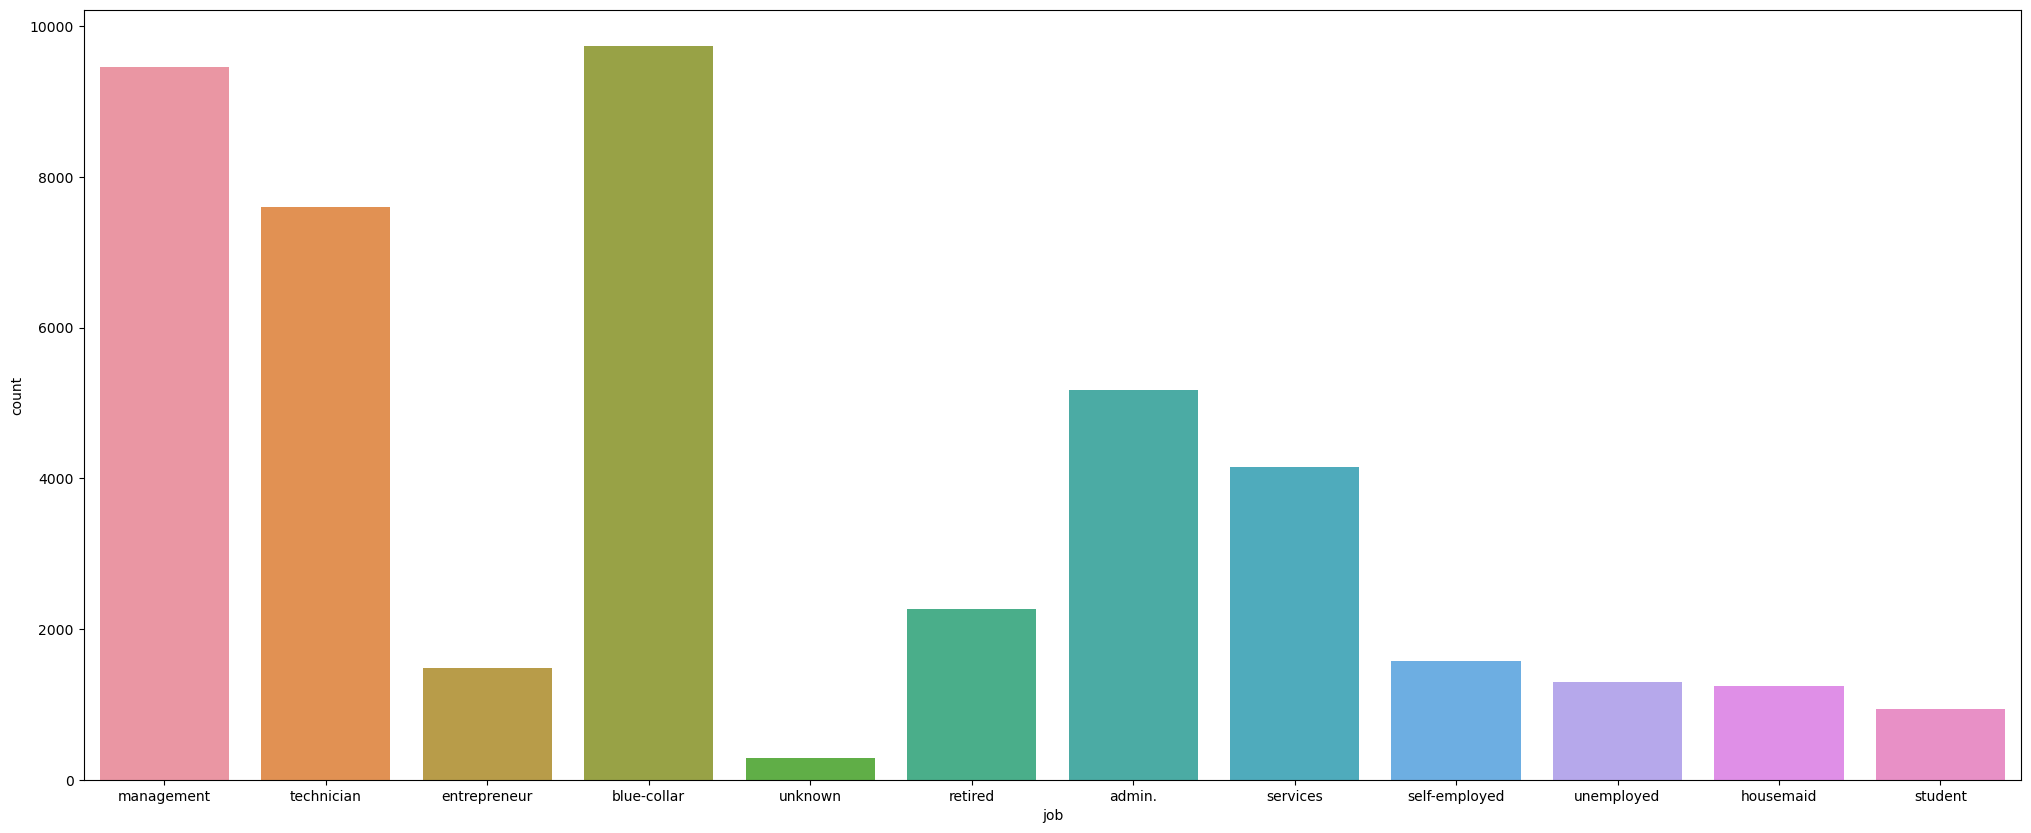

In [197]:
plt.figure(figsize=(25,10))

sns.countplot(x='job', data=df);


- I observed that about 9000 of the customers have blue-collar job, followed by management while less than 1000 have unknown job.

In [198]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [199]:
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

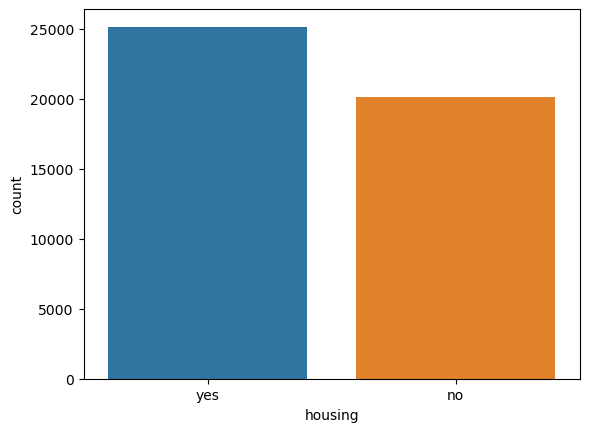

In [200]:
sns.countplot(x='housing', data=df);

- I observed that about 25,000 customer are on housing loan.
- The difference between customers on housing loan and customers not on housing loan is about 5,000 count.

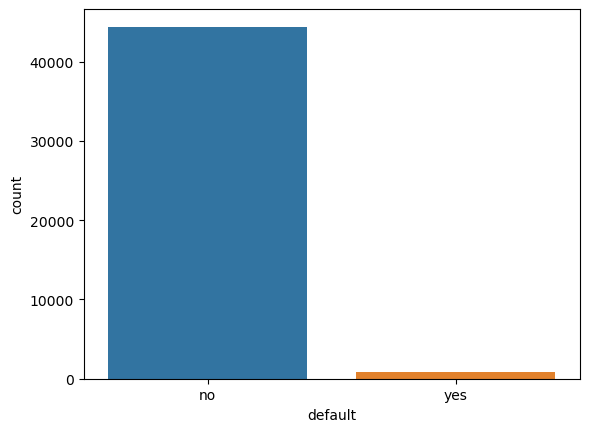

In [201]:
sns.countplot(x='default',data=df);

- A relatively low count of customers have previously defaulted a loan payment or credit card payment with the no count over 40,000.

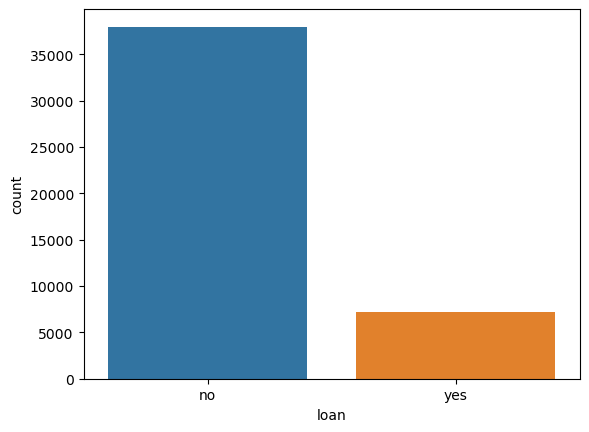

In [202]:
sns.countplot(x='loan', data=df);

- Customer with personal loan are within 5,000 - 9,000 count while customers without loans are above 35,000 count.

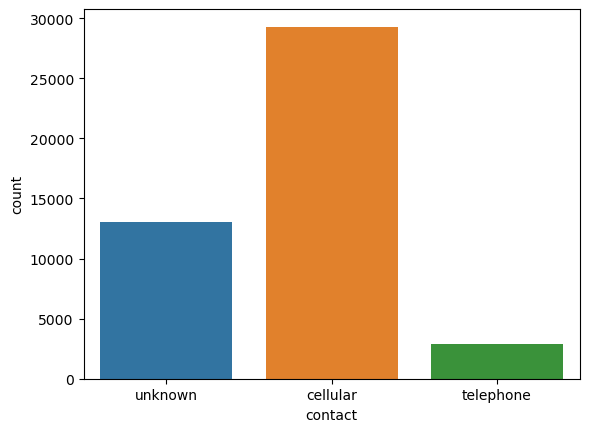

In [203]:
sns.countplot(x='contact', data=df);

- I observed that customers with cellular contact is the highest, followed by unknown and telephone.

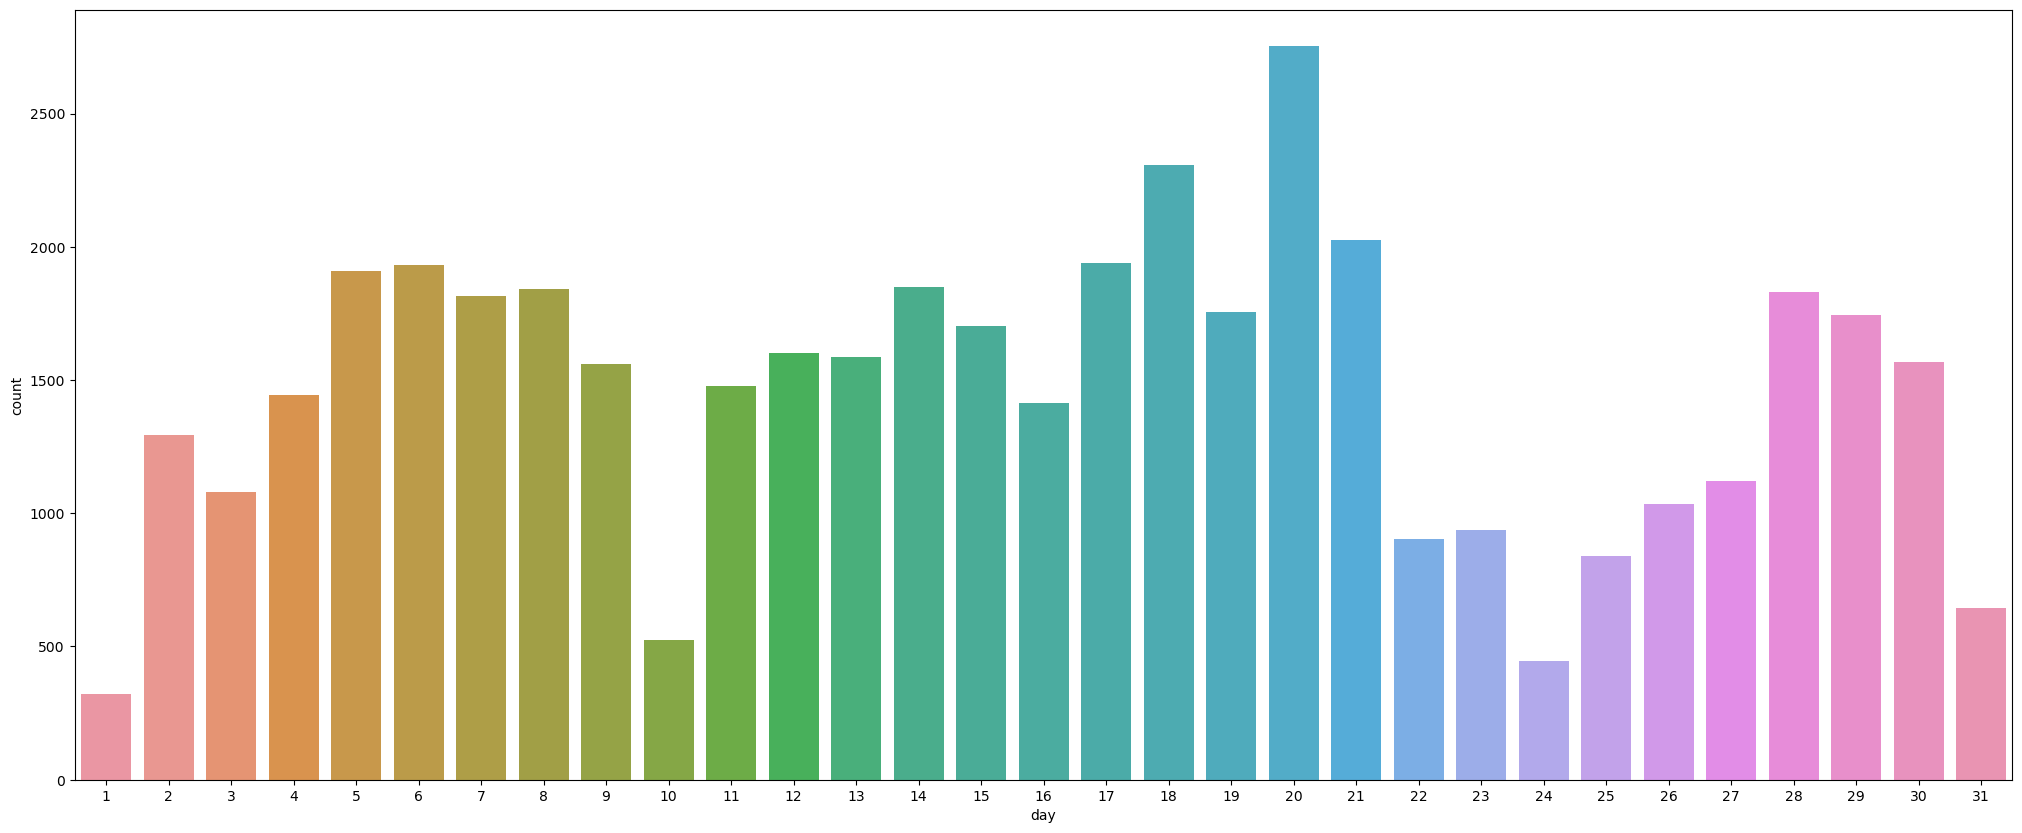

In [204]:
plt.figure(figsize=(25,10))
sns.countplot(x='day', data=df);

- Day 1, 10, 24 are the lowest in the months. Day 31 is not particular to all months in a year.

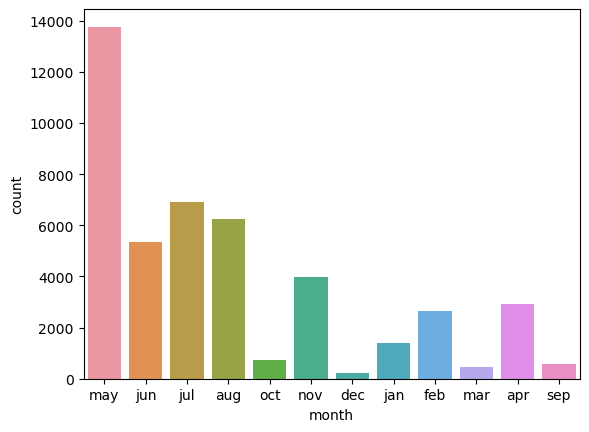

In [205]:
sns.countplot(x='month', data=df);

- I observed that May was the month where about 14,000 customers where last contacted.

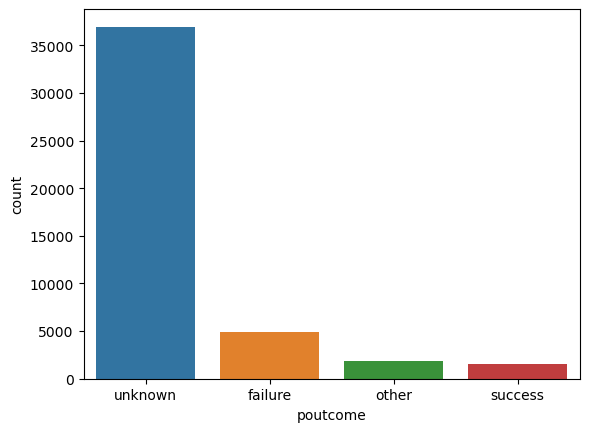

In [206]:
sns.countplot(x='poutcome', data=df);

- I observed that the success of the previous campaign is below 5,000 count. While over 35,000 results are unknown.

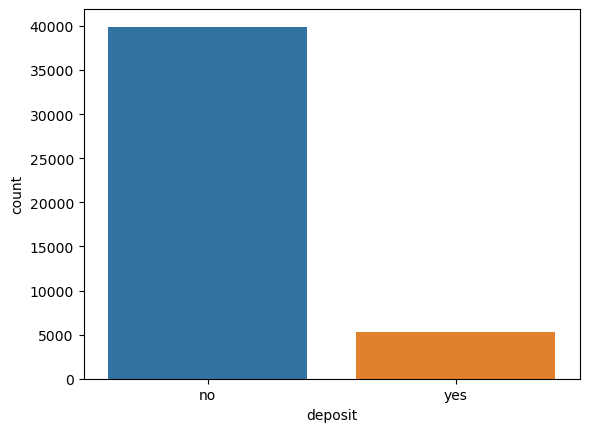

In [207]:
sns.countplot(x='deposit', data=df);

- I observed that 40,000 of customers at Nexux bank are yet to make a deposit.

#### Bivariate Analysis

In [208]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_bracket
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Old Adult(<=65)
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Adult(<=55)
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Youth (<=35)
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Adult(<=55)
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Youth (<=35)


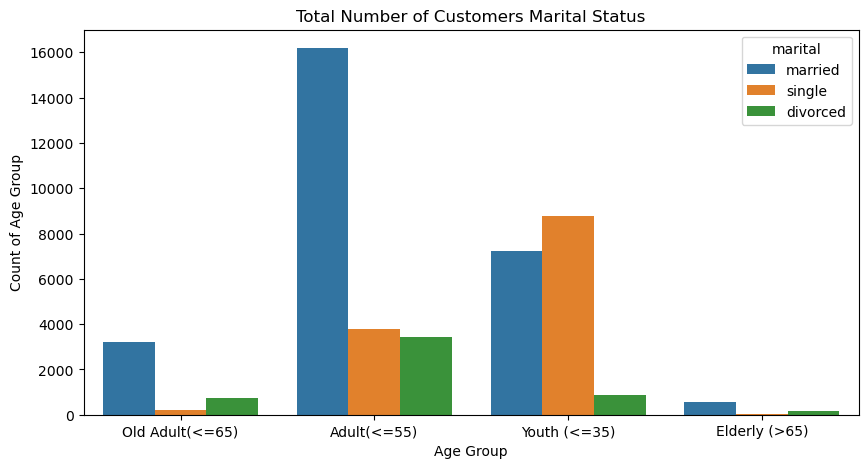

In [209]:
plt.figure(figsize=(10,5))
sns.countplot(x='age_bracket', data=df, hue='marital')
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total Number of Customers Marital Status');

- I observed that Adult (<=55) has the highest count of married customers followed by Youth(<=35), Old Adult(<=65) and Elderly(>65).

- I observed that Youth(<=35) has the highest count of single customers followed by Adult(<=55), Old Adult(<=65) and Elderly(>65).

- I observed that Adult(<55) has the highest count of divorced customers followed by Youth(<=35), Old Adult(<=65) and Elderly(>65).

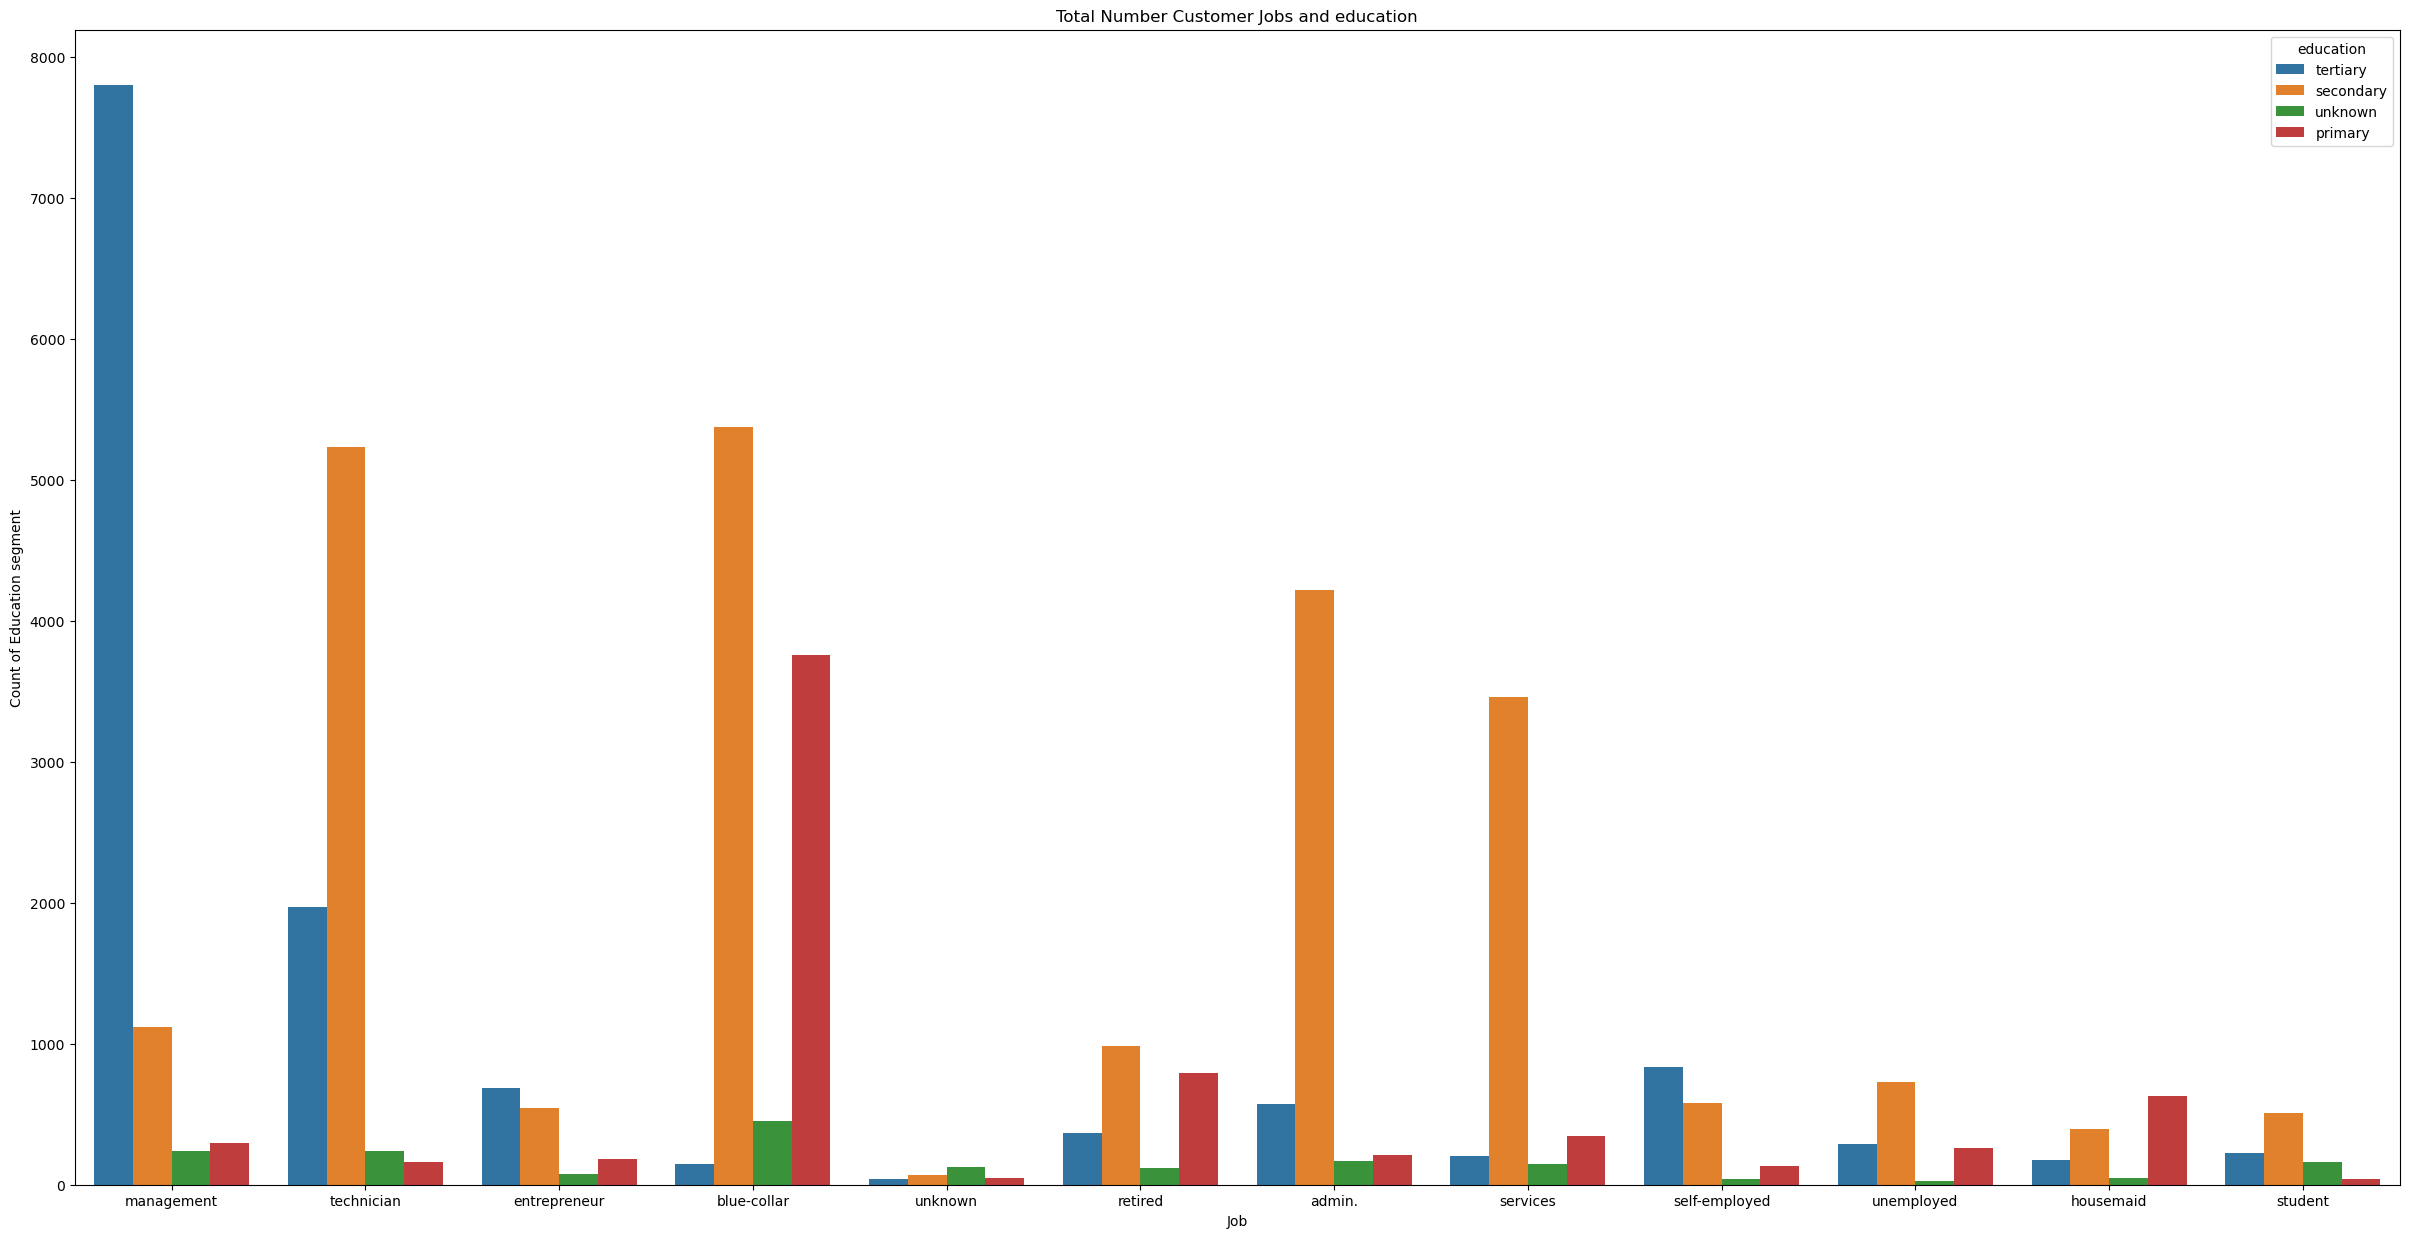

In [210]:
plt.figure(figsize=(30,15))
sns.countplot(x='job', data=df, hue='education')
plt.xlabel('Job')
plt.ylabel('Count of Education segment')
plt.title('Total Number Customer Jobs and education');

- I observed that management jobs has highest count of tertiary education.
- I observed that blue-colar jobs has highest count of secondary education.
- I observed that blue-colar jobs has highest count of unknown education.
- I observed that blue-colar jobs has highest count of primary education.

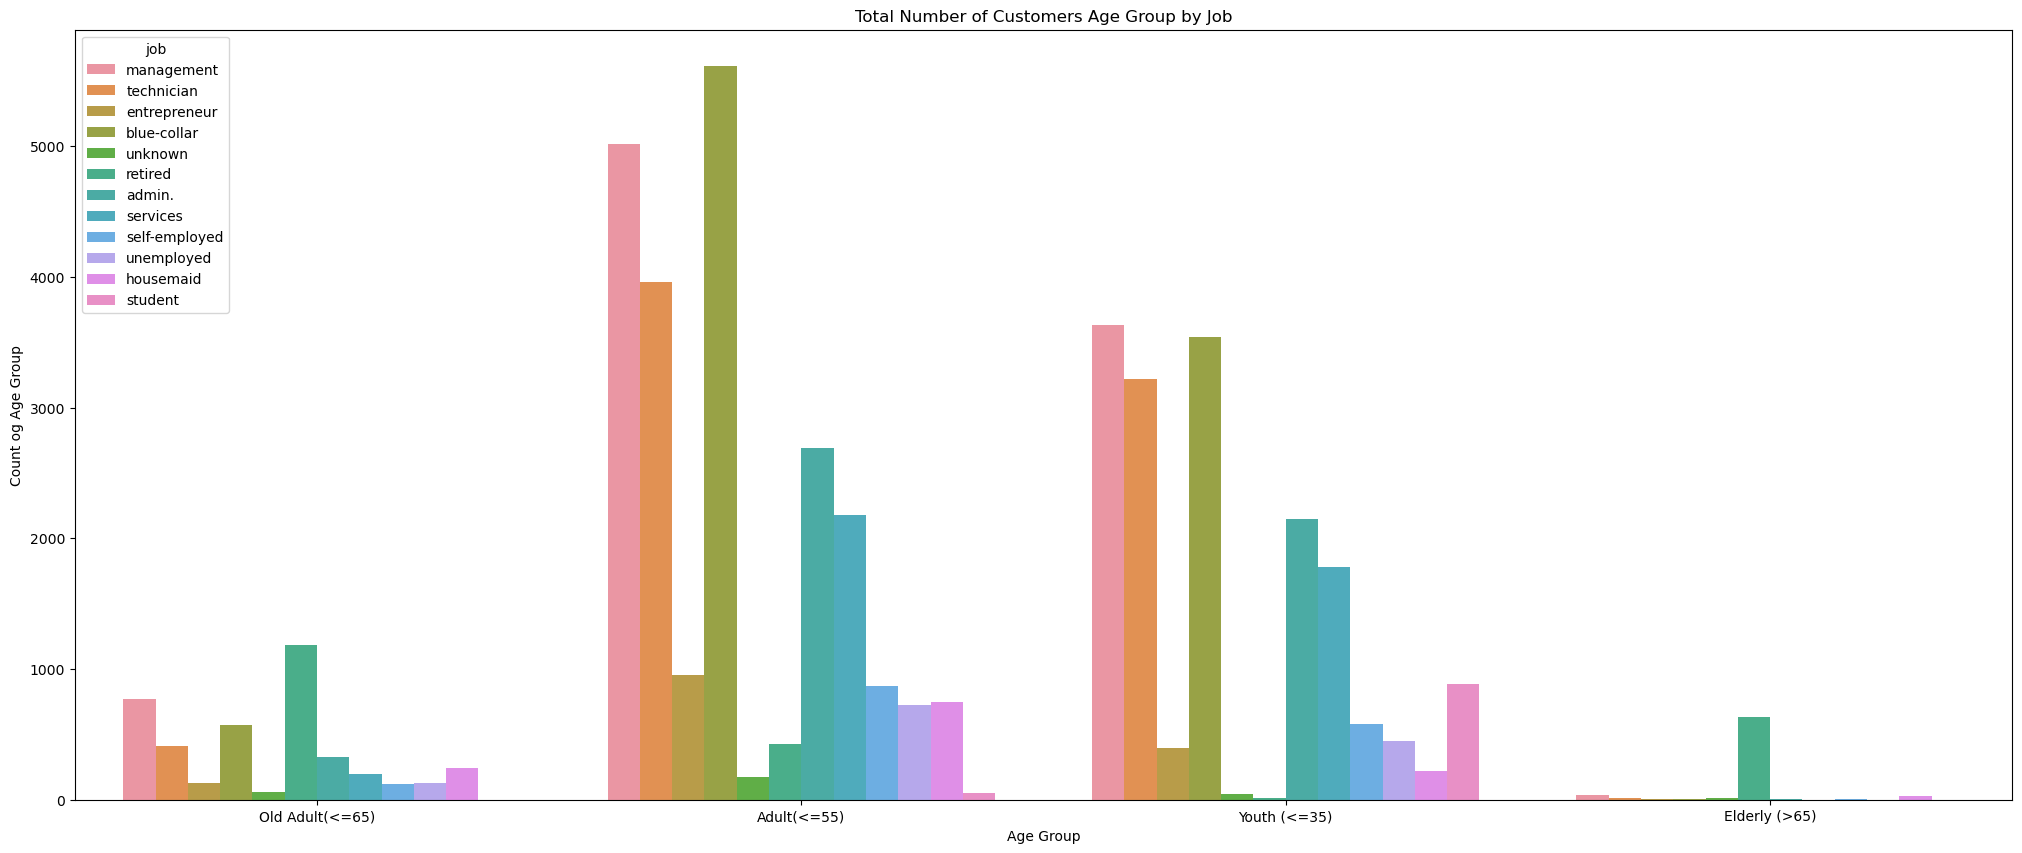

In [211]:
plt.figure(figsize=(25,10))
sns.countplot(x='age_bracket', data=df, hue='job')
plt.xlabel('Age Group')
plt.ylabel('Count og Age Group')
plt.title('Total Number of Customers Age Group by Job');

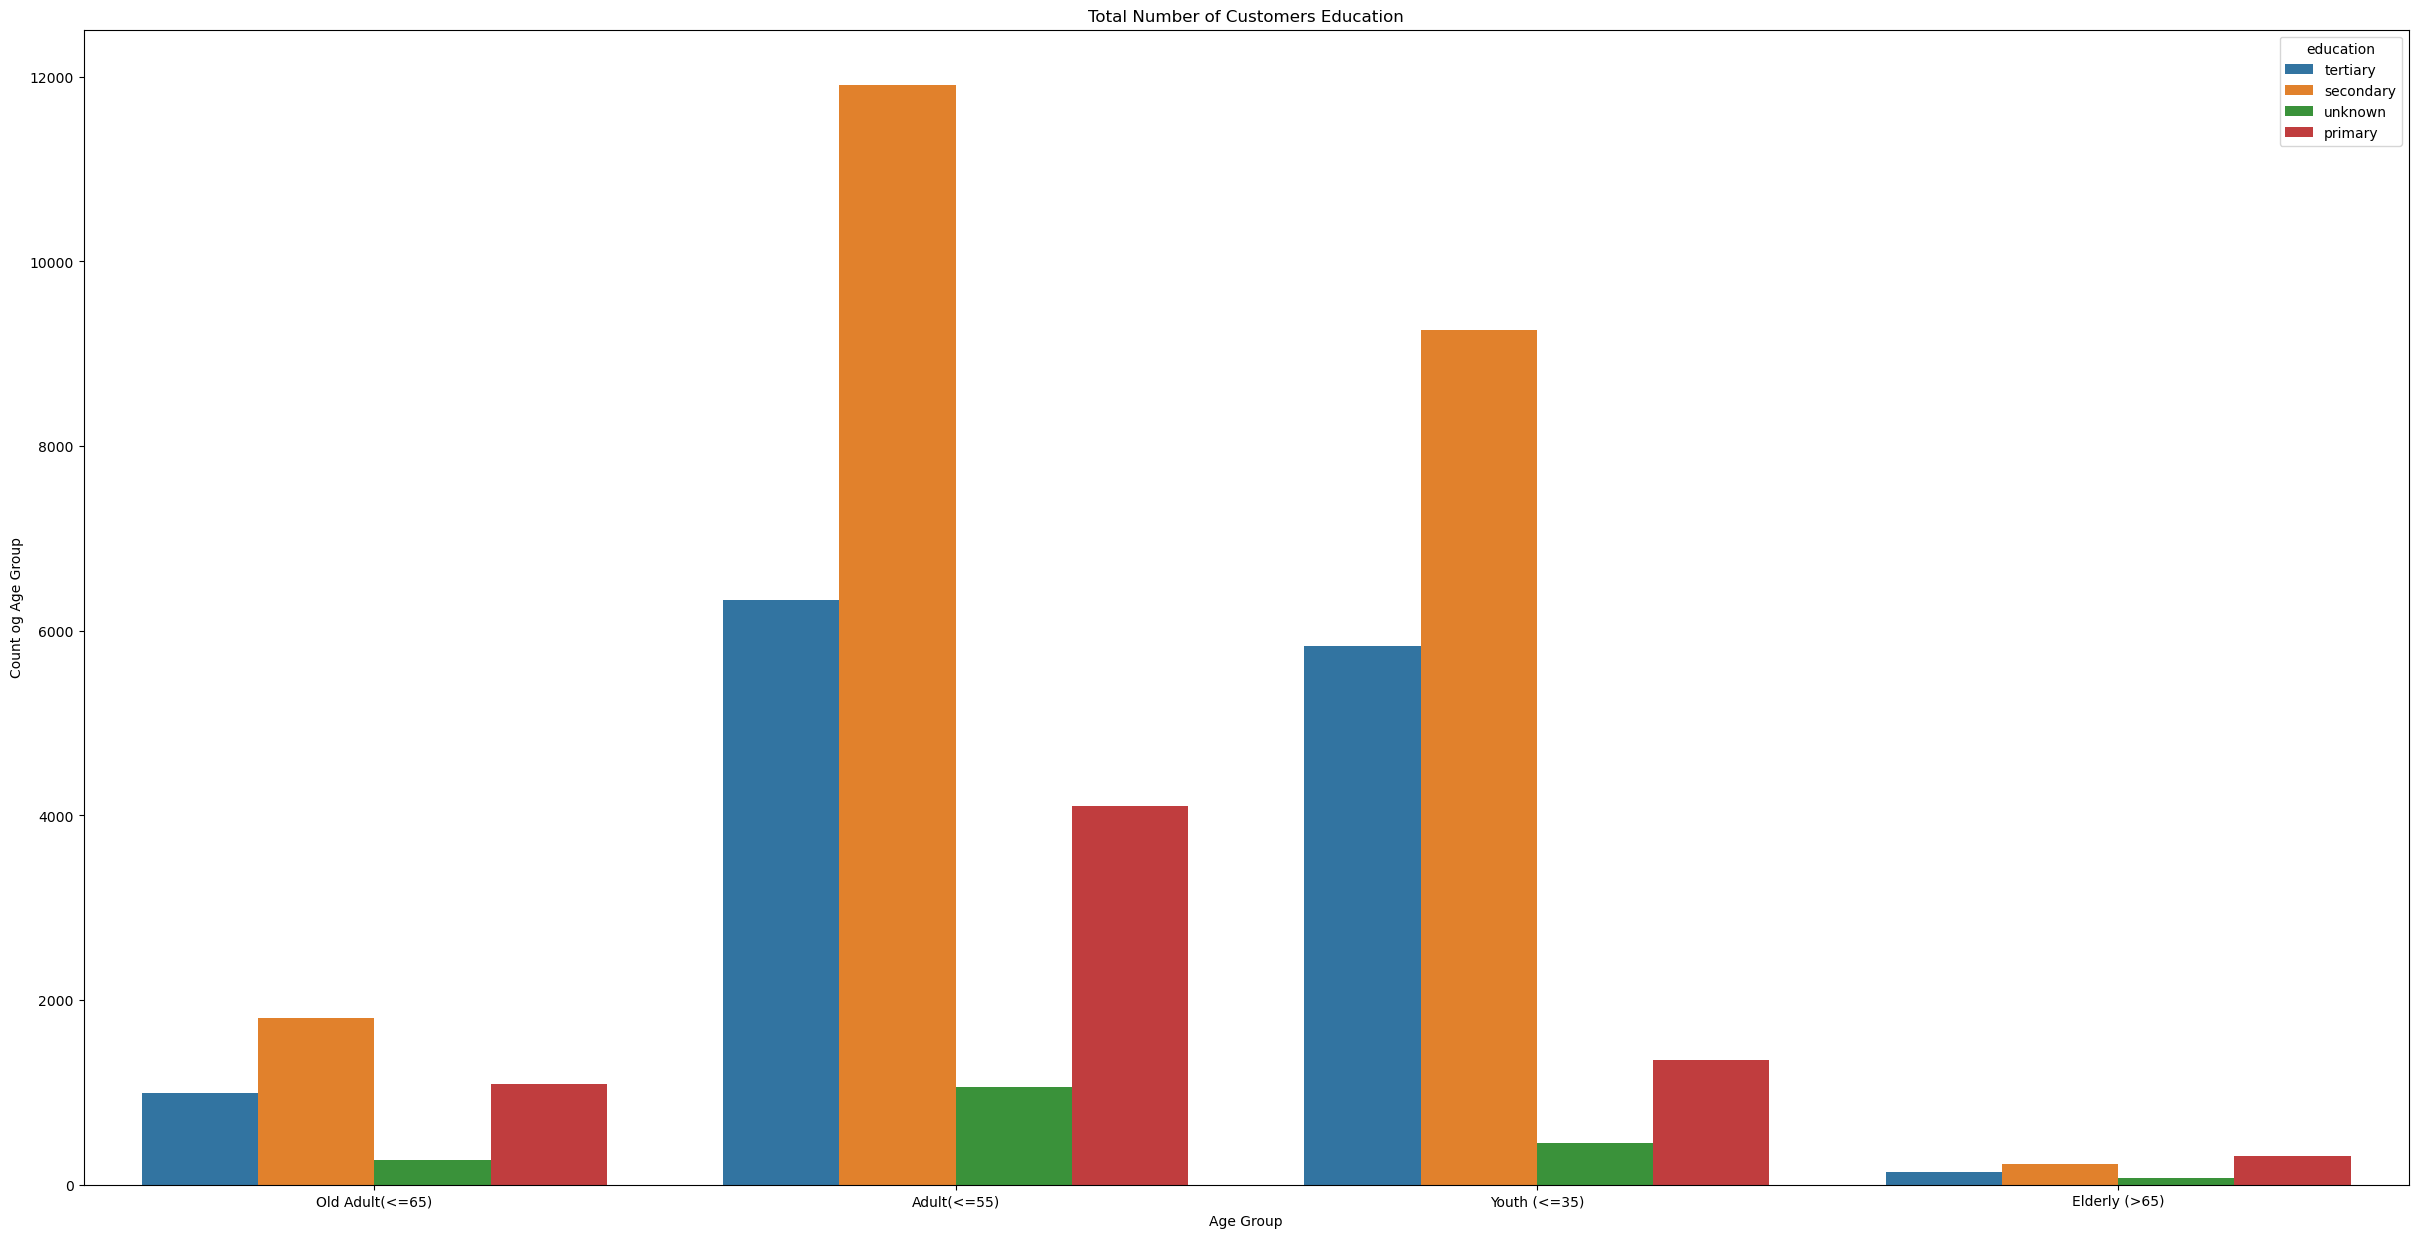

In [212]:
plt.figure(figsize=(30,15))
sns.countplot(x='age_bracket', data=df, hue='education')
plt.xlabel('Age Group')
plt.ylabel('Count og Age Group')
plt.title('Total Number of Customers Education');

- I observed Adult(<=55) has the highest count of secondary education followed by Youth(<=35), Old Adult(<=65) and Elderly(>65).
- I observed Adult(<=55) has the highest count of tertiary education followed by  Youth(<=35), Old Adult (<=65) and Elderly(>65).
- I observed Adult(<=55) has the highest count of unknown education followed by  Youth(<=35), Old Adult (<=65) and Elderly(>65).
- I observed Adult(<=55) has the highest count of primary education followed by  Youth(<=35), Old Adult (<=65) and Elderly(>65).

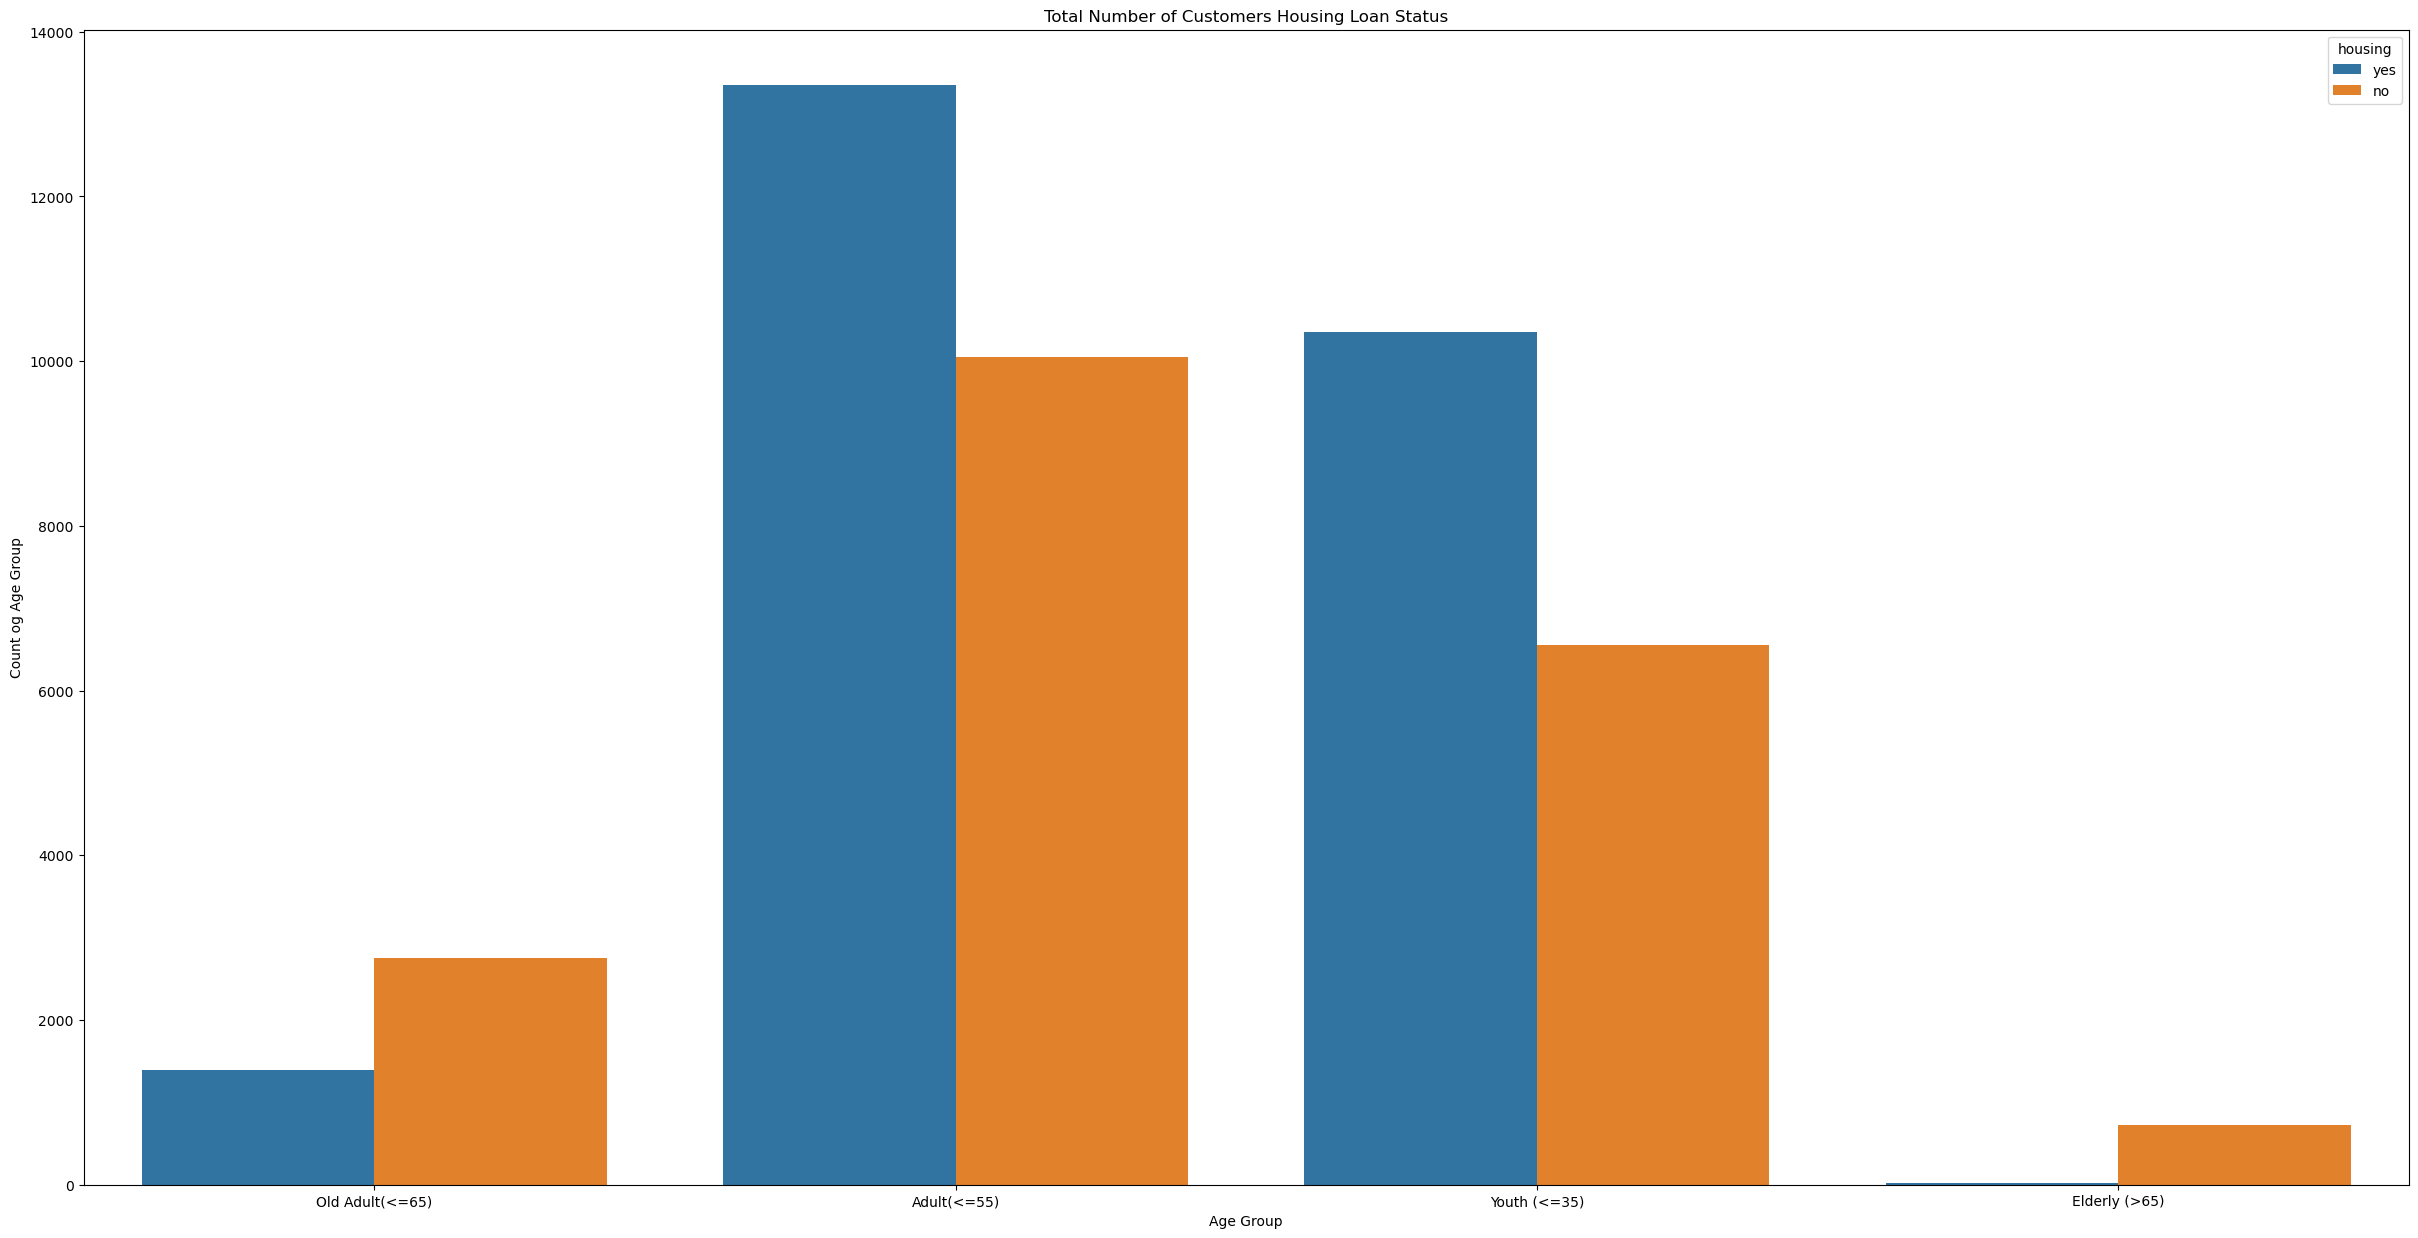

In [213]:
plt.figure(figsize=(30,15))
sns.countplot(x='age_bracket', data=df, hue='housing')
plt.xlabel('Age Group')
plt.ylabel('Count og Age Group')
plt.title('Total Number of Customers Housing Loan Status');

- I observed Adult(<=55) has the highest count of YES Housing Loan followed by  Youth(<=35), Old Adult (<=65) and Elderly(>65).
- I observed Adult(<=55) has the highest count of NO Housing Loan followed by  Youth(<=35), Old Adult (<=65) and Elderly(>65).

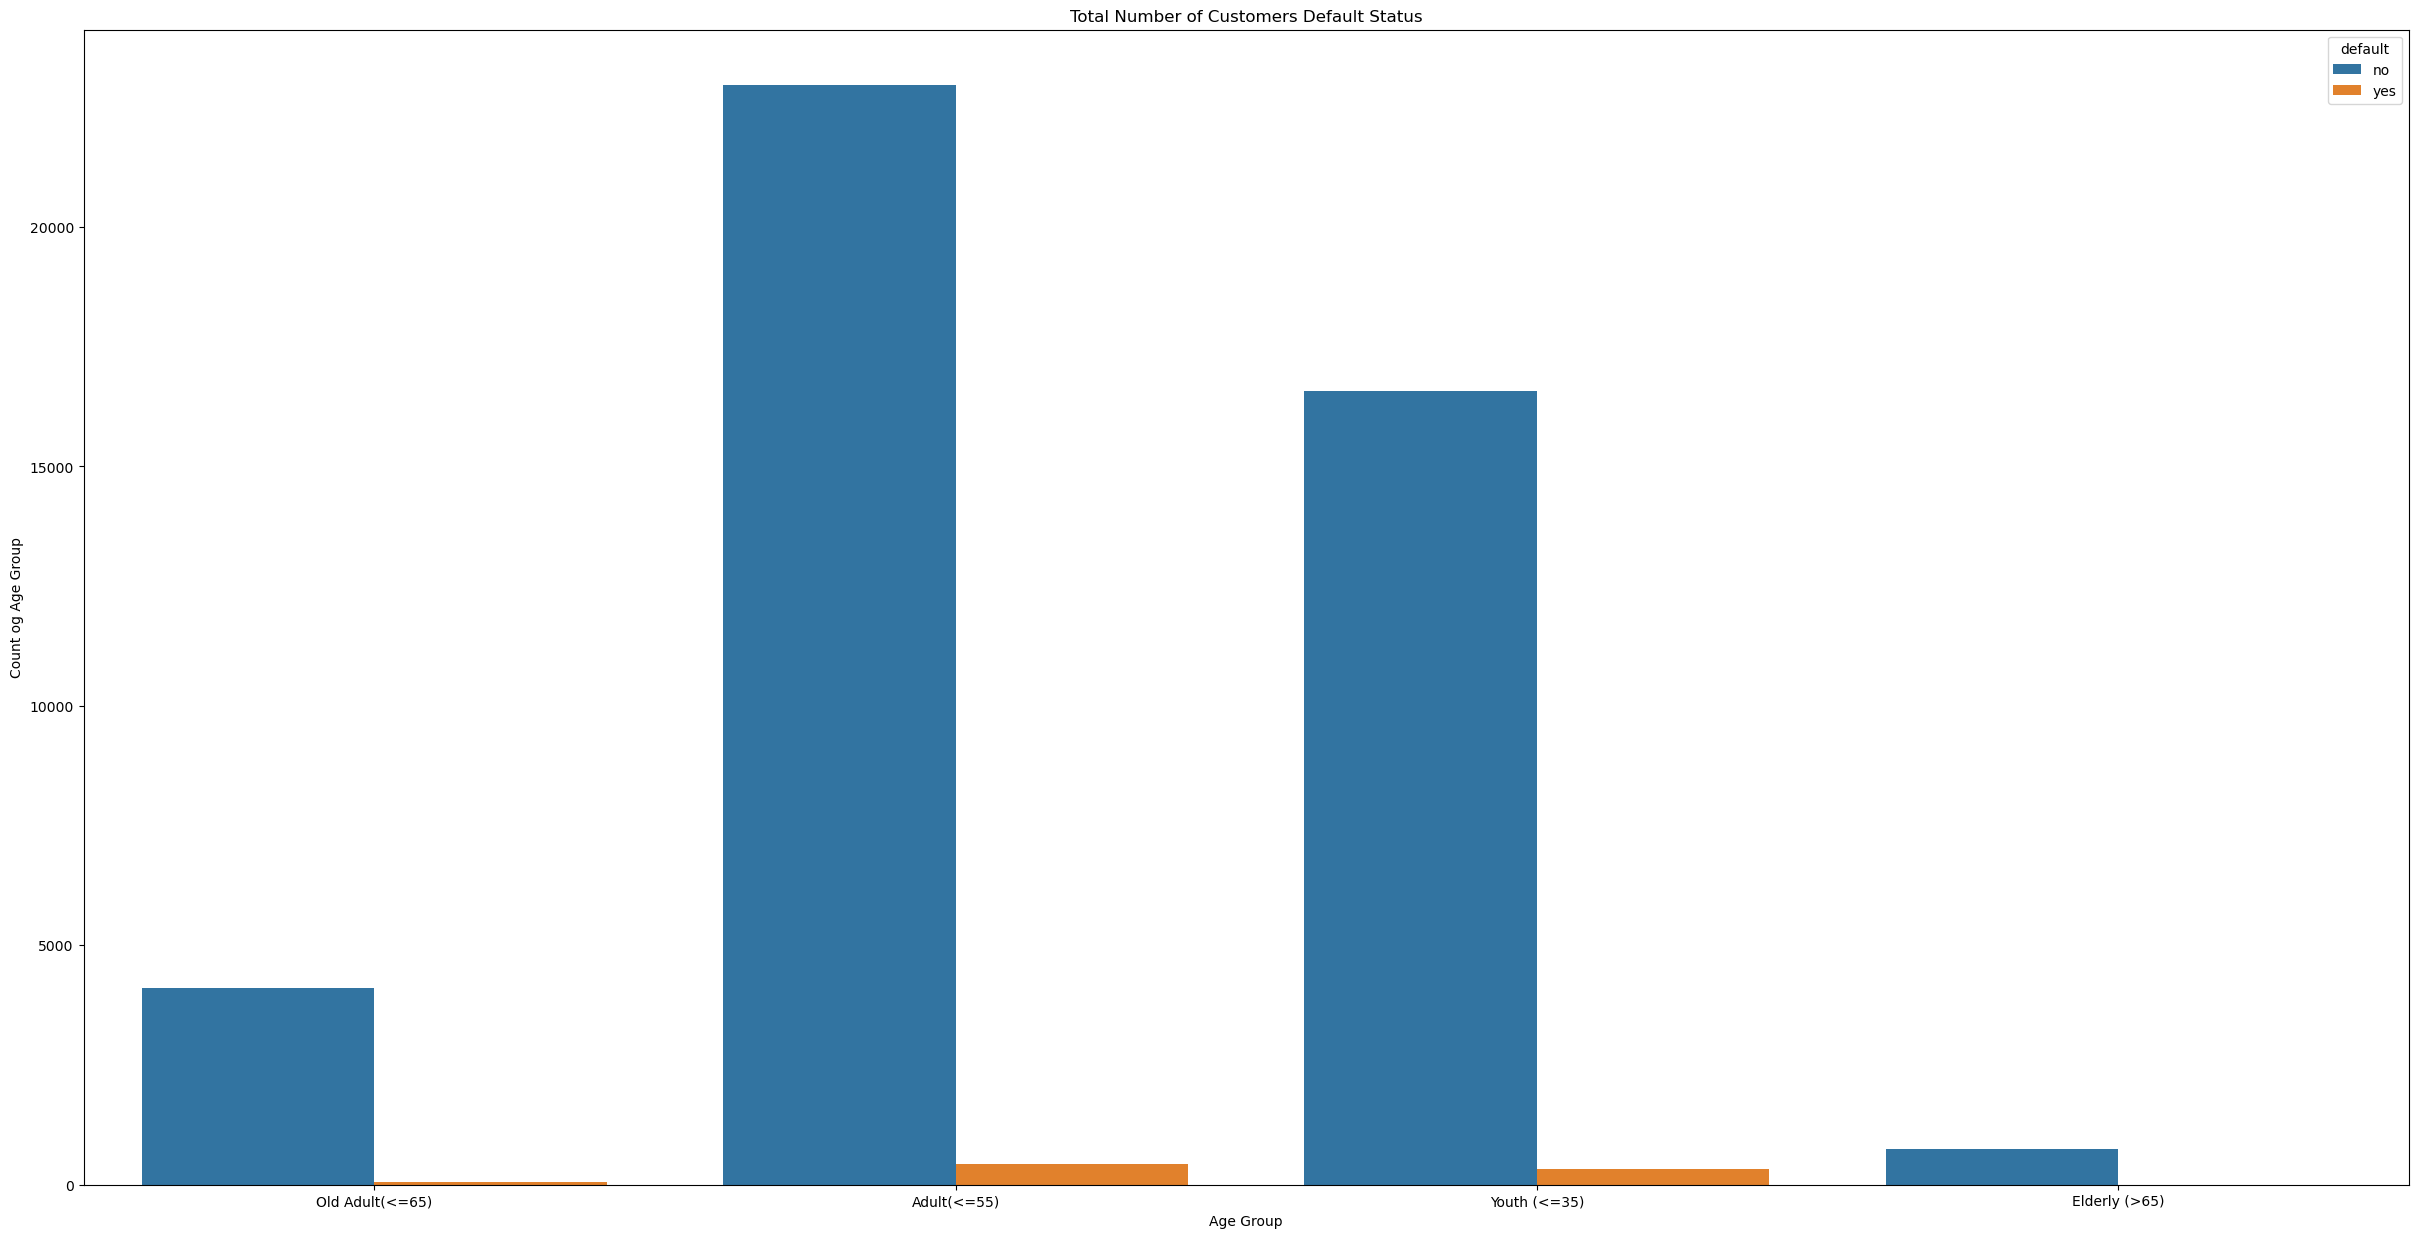

In [214]:
plt.figure(figsize=(30,15))
sns.countplot(x='age_bracket', data=df, hue='default')
plt.xlabel('Age Group')
plt.ylabel('Count og Age Group')
plt.title('Total Number of Customers Default Status');

- I observed that Adult(<=55) has highest count of customers without Personal Loan, followed by Youth(<=35), Old Adult(<=65) and Elderly(>65).
- I observed that Elderly(>65) has lowest count of Personal Loan, followed by Old Adult(<=65), Youth(<=35) and Adult(<=55).

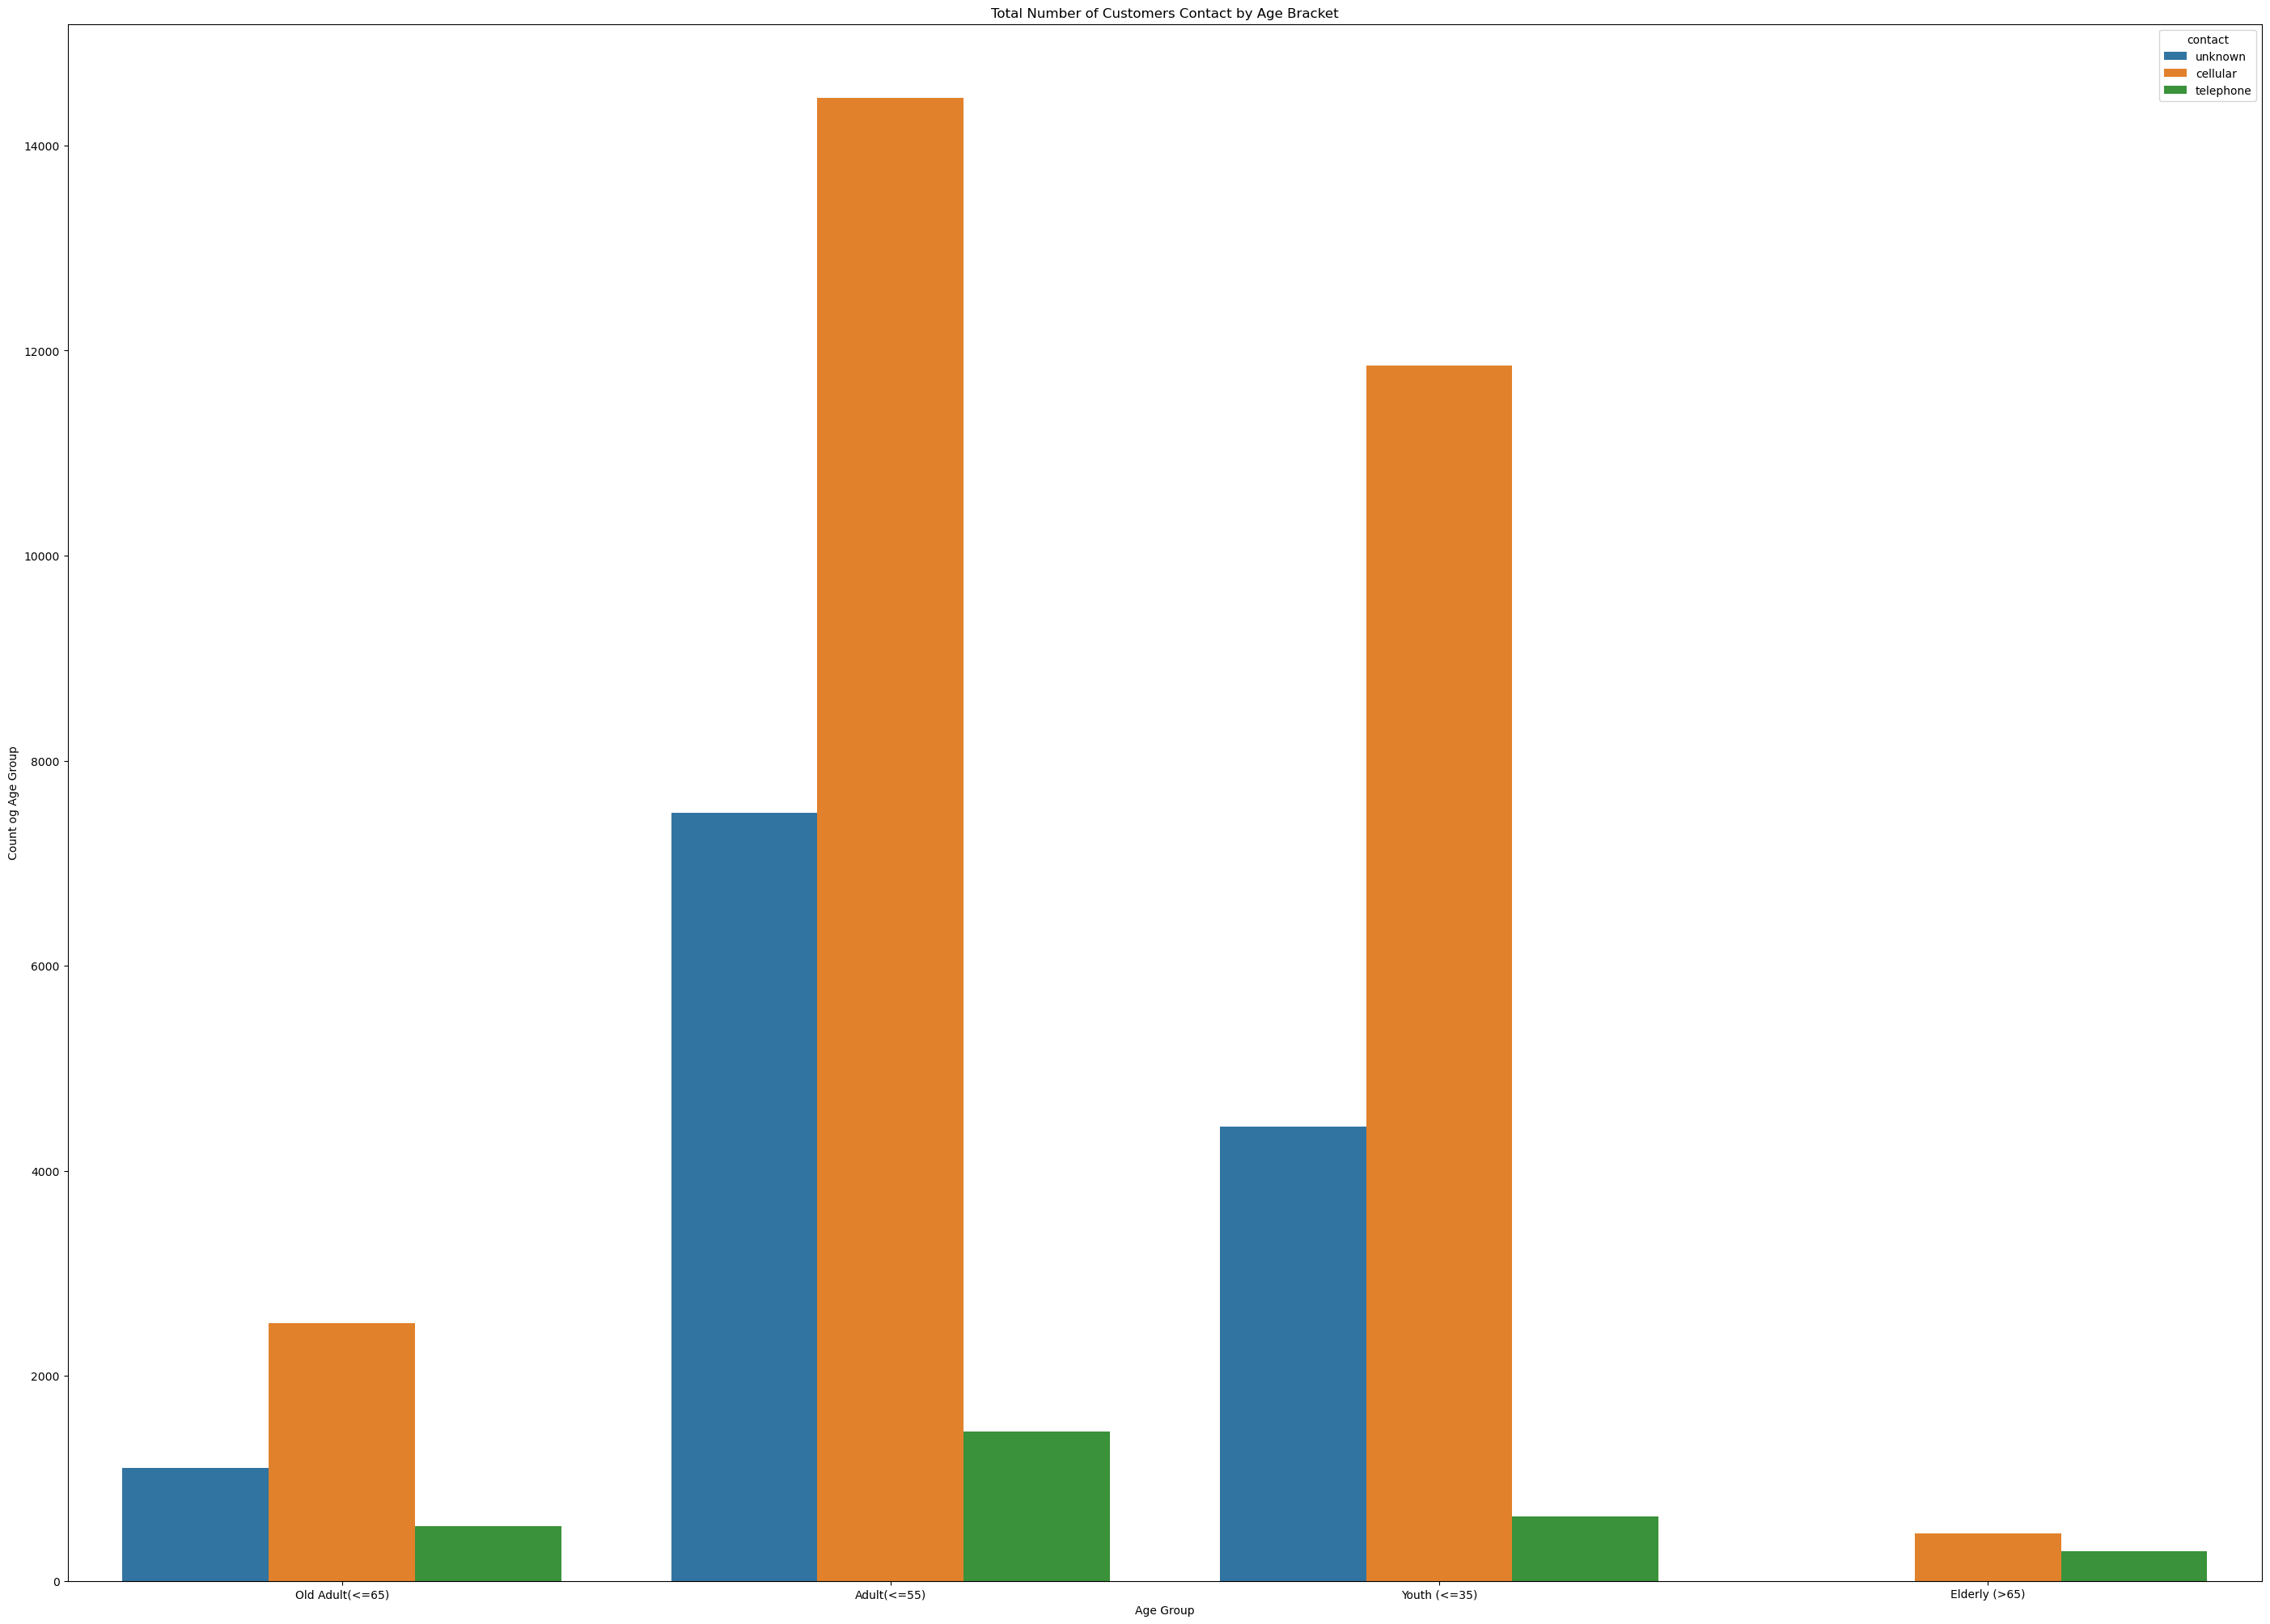

In [215]:
plt.figure(figsize=(35,25))
sns.countplot(x='age_bracket', data=df, hue='contact')
plt.xlabel('Age Group')
plt.ylabel('Count og Age Group')
plt.title('Total Number of Customers Contact by Age Bracket');

- I observed that Adult(<=55) has the highest count of customers cellular contact followed by Youth(<=35), Old Adult(<=65) and Elderly(>=65).
- I observed that Adult(<=55) has the highest count of customers unknown contact followed by Youth(<=35), Old Adult(<=65) and Elderly(>=65).
- I observed that Adult(<=55) has the highest count of customers telephone contact followed by Youth(<=35), Old Adult(<=65) and Elderly(>=65).

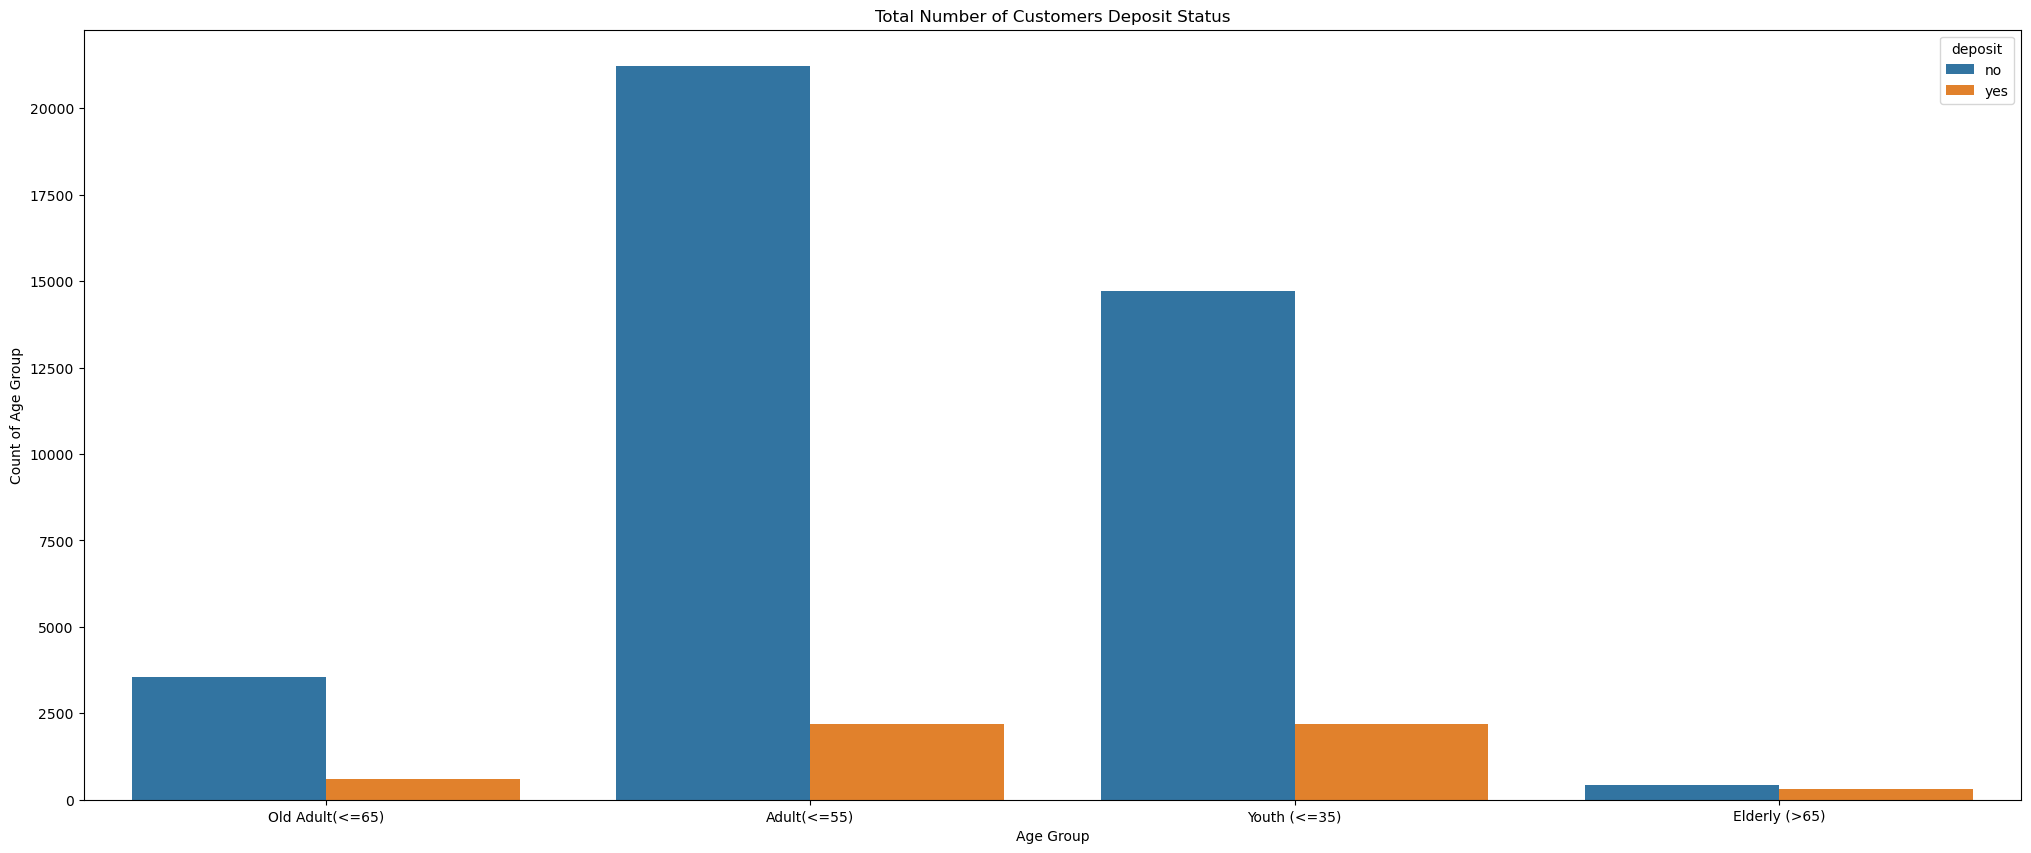

In [216]:
plt.figure(figsize=(25,10))
sns.countplot(x='age_bracket', data=df, hue='deposit')
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total Number of Customers Deposit Status');

- I observed that Adult(<=55) has the highest count of NO deposits, followed by Youth(<=35), Old Adult(<=65) and Elderly(>65).

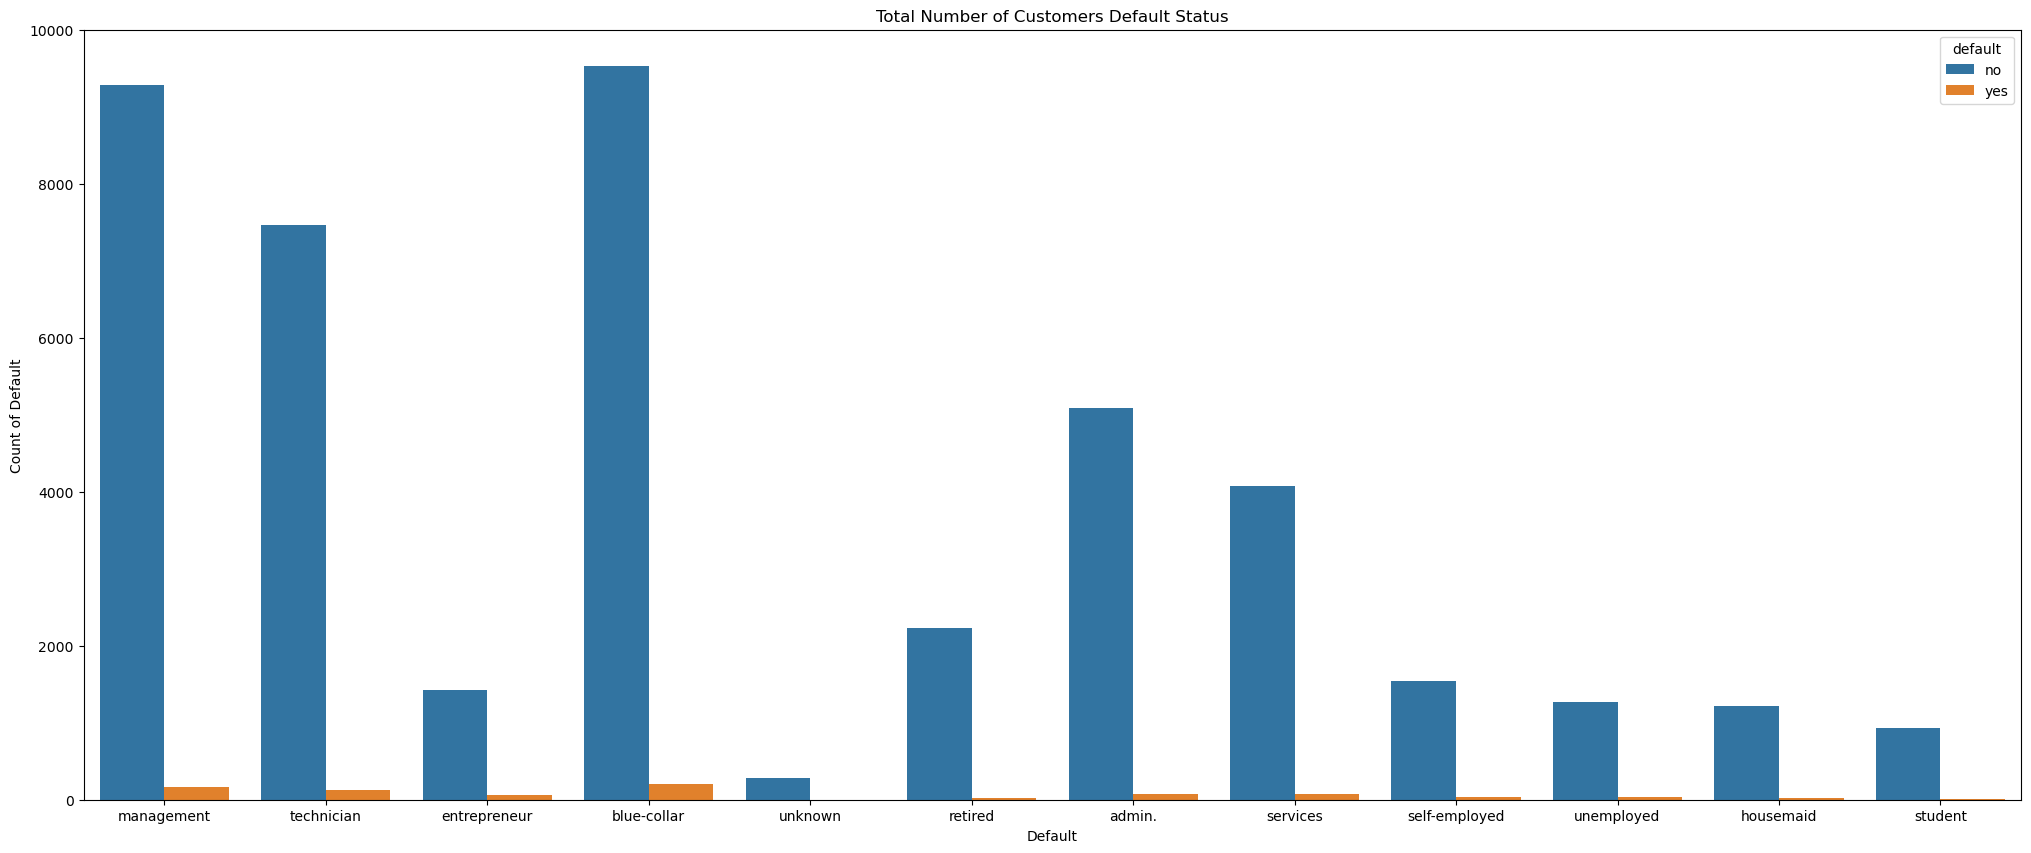

In [217]:
plt.figure(figsize=(25,10))
sns.countplot(x='job', data=df, hue='default')
plt.xlabel('Default')
plt.ylabel('Count of Default')
plt.title('Total Number of Customers Default Status');

- I observed that across all  customers job types there is a very high count of NO Default. 
- I observed that all loan defaults count across customers job are very low. 

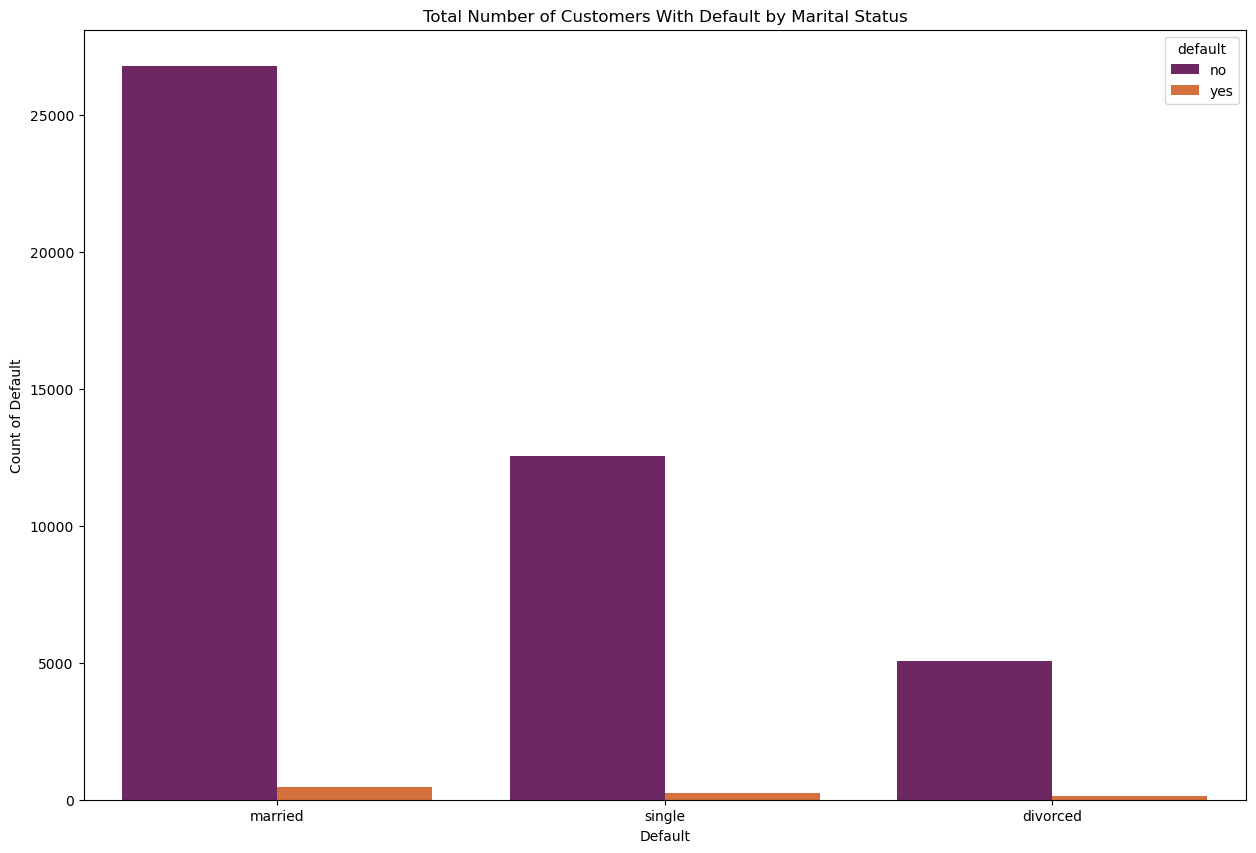

In [218]:
plt.figure(figsize=(15,10))
sns.countplot(x='marital', data=df, hue='default', palette='inferno')
plt.xlabel('Default')
plt.ylabel('Count of Default')
plt.title('Total Number of Customers With Default by Marital Status');

- I observed a high default count from married customers, followed by single and divorced. 

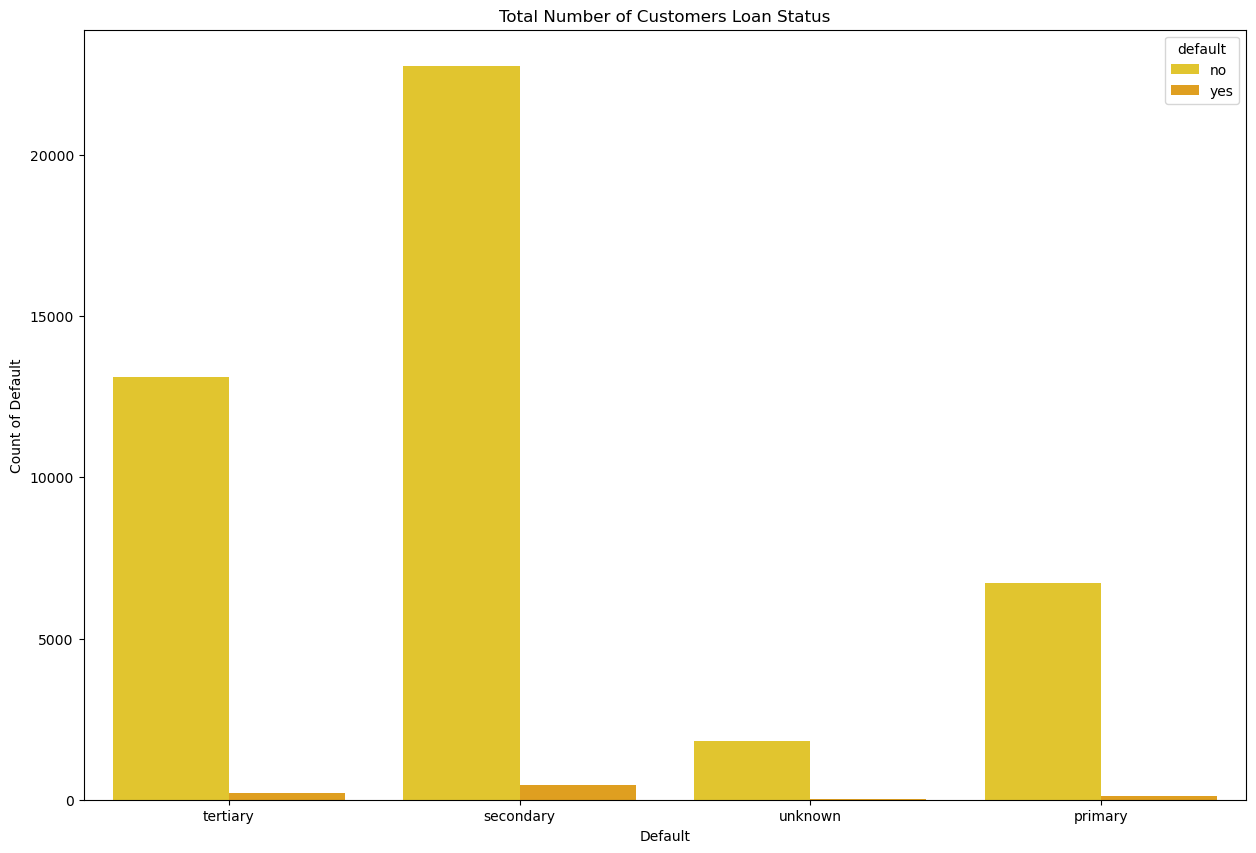

In [219]:
plt.figure(figsize=(15,10))
sns.countplot(x='education', data=df, hue='default', palette='Wistia')
plt.xlabel('Default')
plt.ylabel('Count of Default')
plt.title('Total Number of Customers Loan Status');

- I observed that Secondary has the highest loan status, followed tertiary, primary and unknown. 

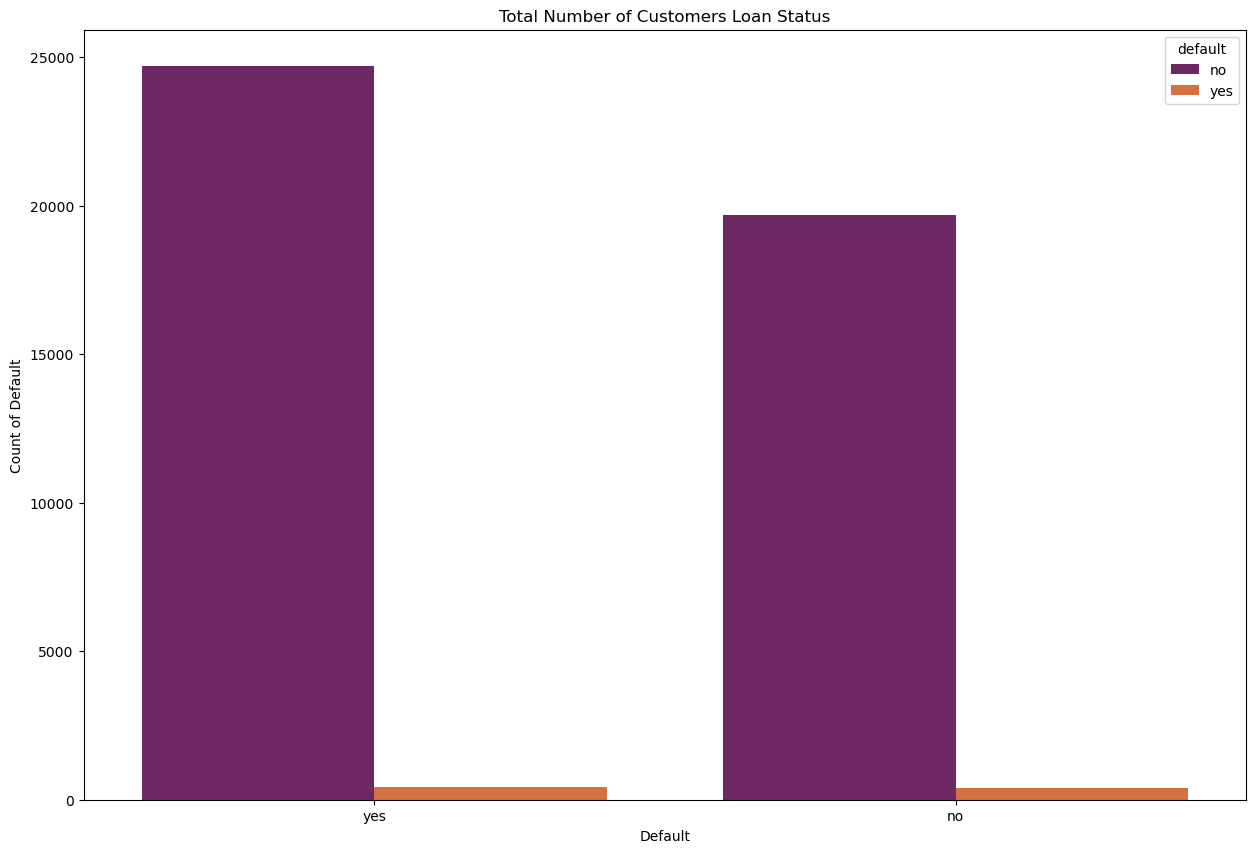

In [220]:
plt.figure(figsize=(15,10))
sns.countplot(x='housing', data=df, hue='default',palette='inferno')
plt.xlabel('Default')
plt.ylabel('Count of Default')
plt.title('Total Number of Customers Loan Status');

- I observed that customers with and without housing loan has the same count of default.

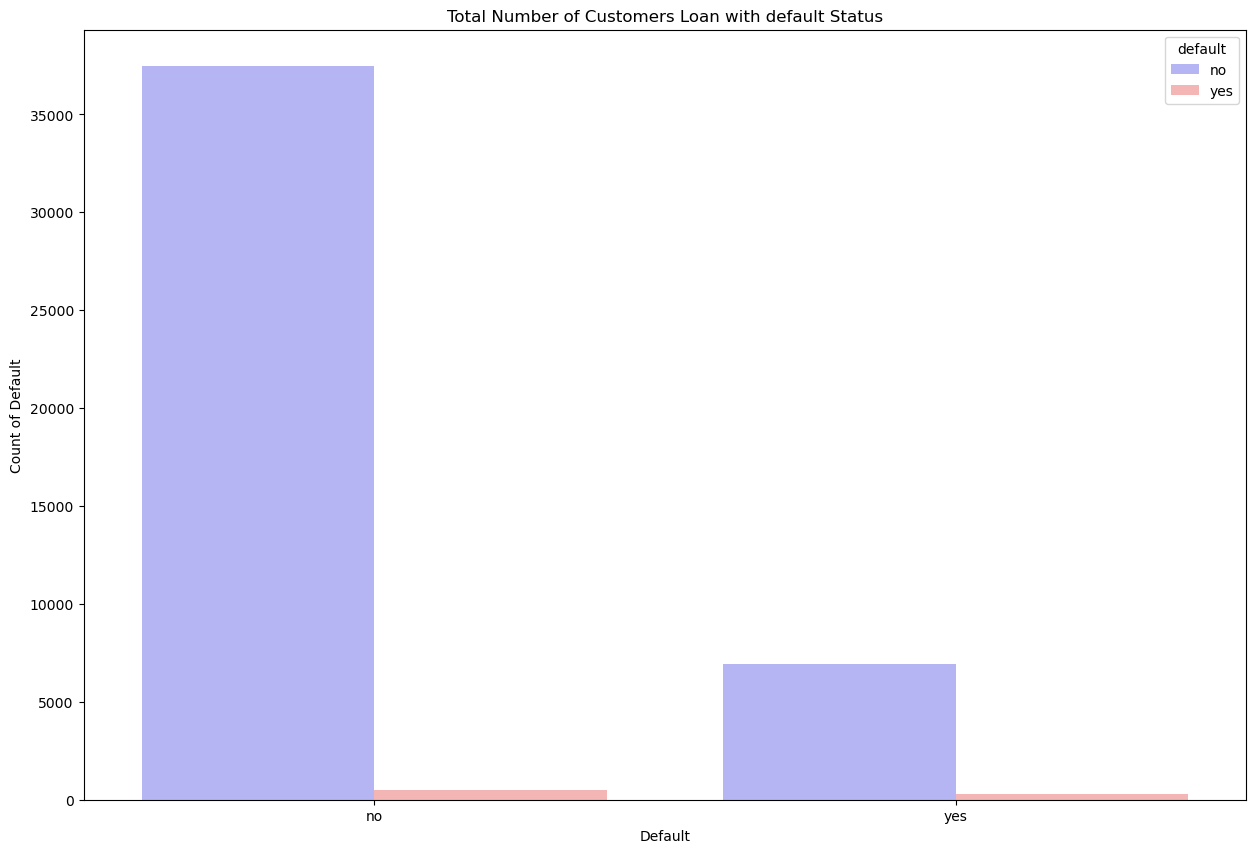

In [221]:
plt.figure(figsize=(15,10))
sns.countplot(x='loan', data=df, hue='default',palette='bwr')
plt.xlabel('Default')
plt.ylabel('Count of Default')
plt.title('Total Number of Customers Loan with default Status');

- I observed customers with personal loan have low default count than customers without personal loan.

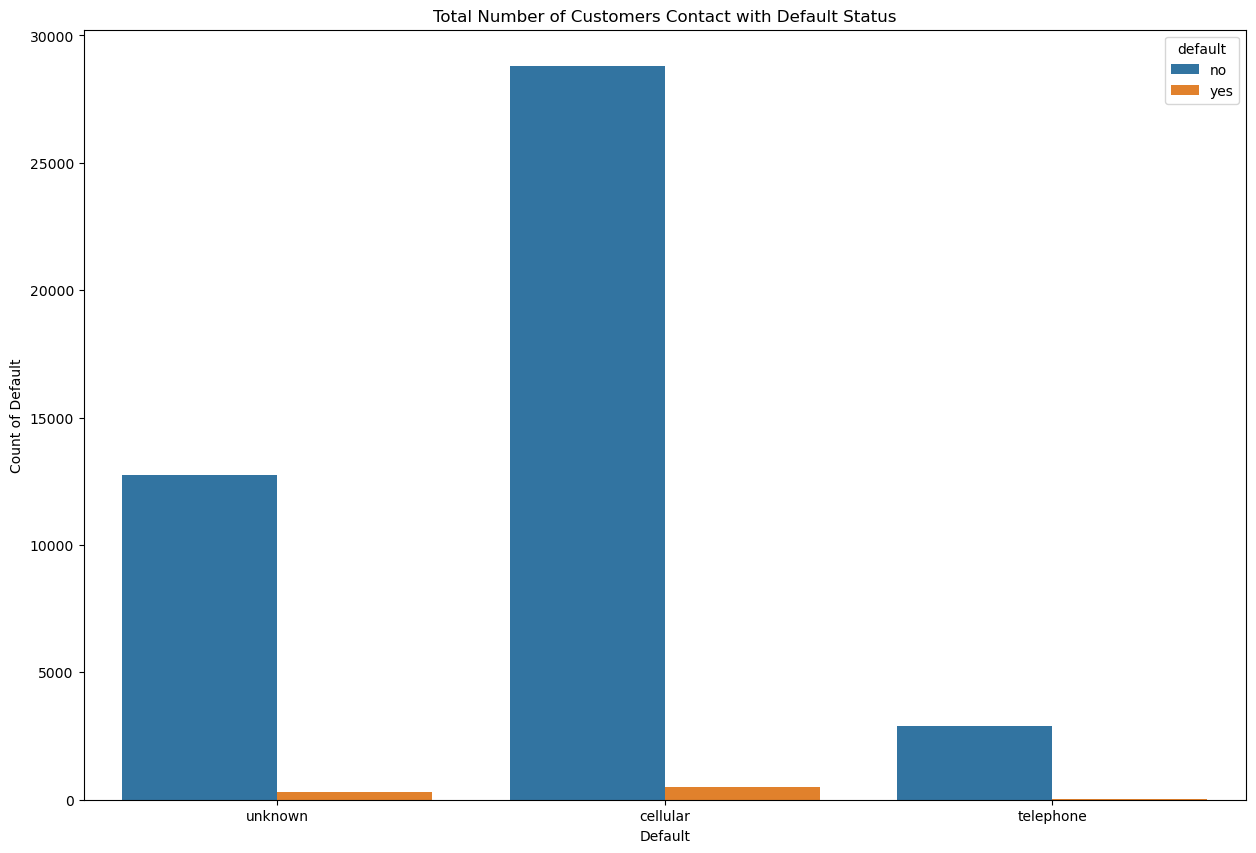

In [222]:
plt.figure(figsize=(15,10))
sns.countplot(x='contact', data=df, hue='default')
plt.xlabel('Default')
plt.ylabel('Count of Default')
plt.title('Total Number of Customers Contact with Default Status');

- I observed that customers with cellular contact has the highest count of default, seconded by unknown and telephone.

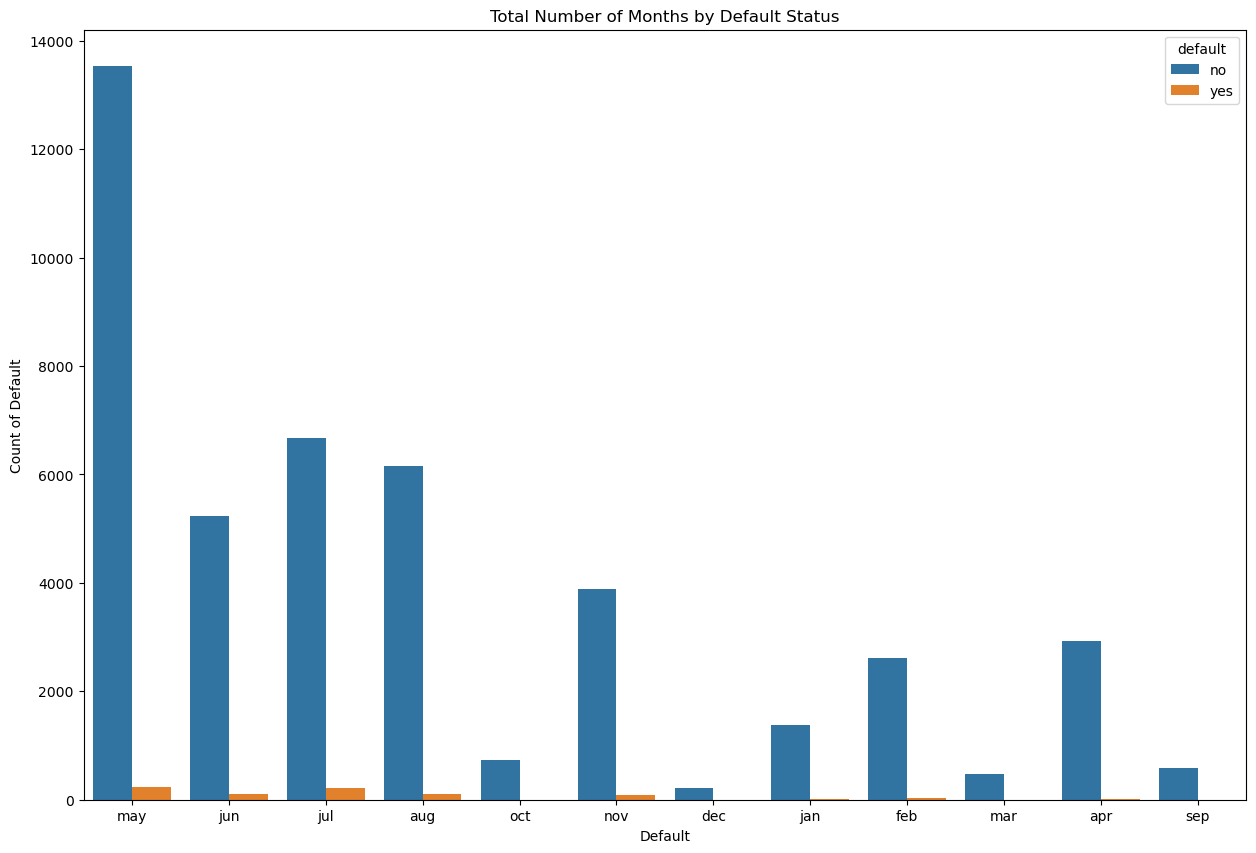

In [223]:
plt.figure(figsize=(15,10))
sns.countplot(x='month', data=df, hue='default')
plt.xlabel('Default')
plt.ylabel('Count of Default')
plt.title('Total Number of Months by Default Status');

- I observed that July and May has the highest count of default.
- I observed that October, December, January, March, April, and September has the lowest count of defaults.

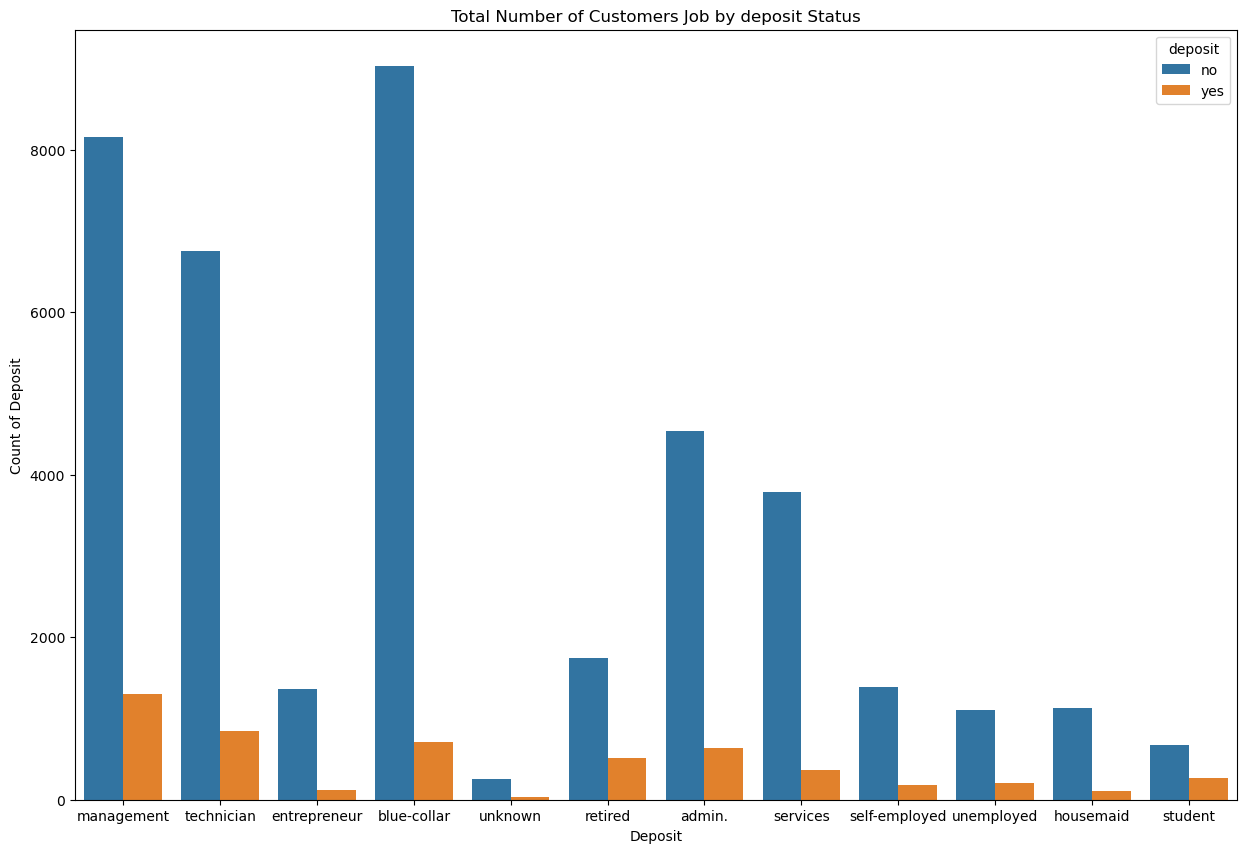

In [224]:
plt.figure(figsize=(15,10))
sns.countplot(x='job', data=df, hue='deposit')
plt.xlabel('Deposit')
plt.ylabel('Count of Deposit')
plt.title('Total Number of Customers Job by deposit Status');

- I observed that blue-collar has the highest count of NO deposit, followed by management, technician, admin, services, retired, entrepreneur, self-employed, housemaid, unemployed, student and unknown.
- I observed that management, technician, admin, blue-collar, services, student, unemployed, self-employed, entrepreneur, housemaid and unknown.

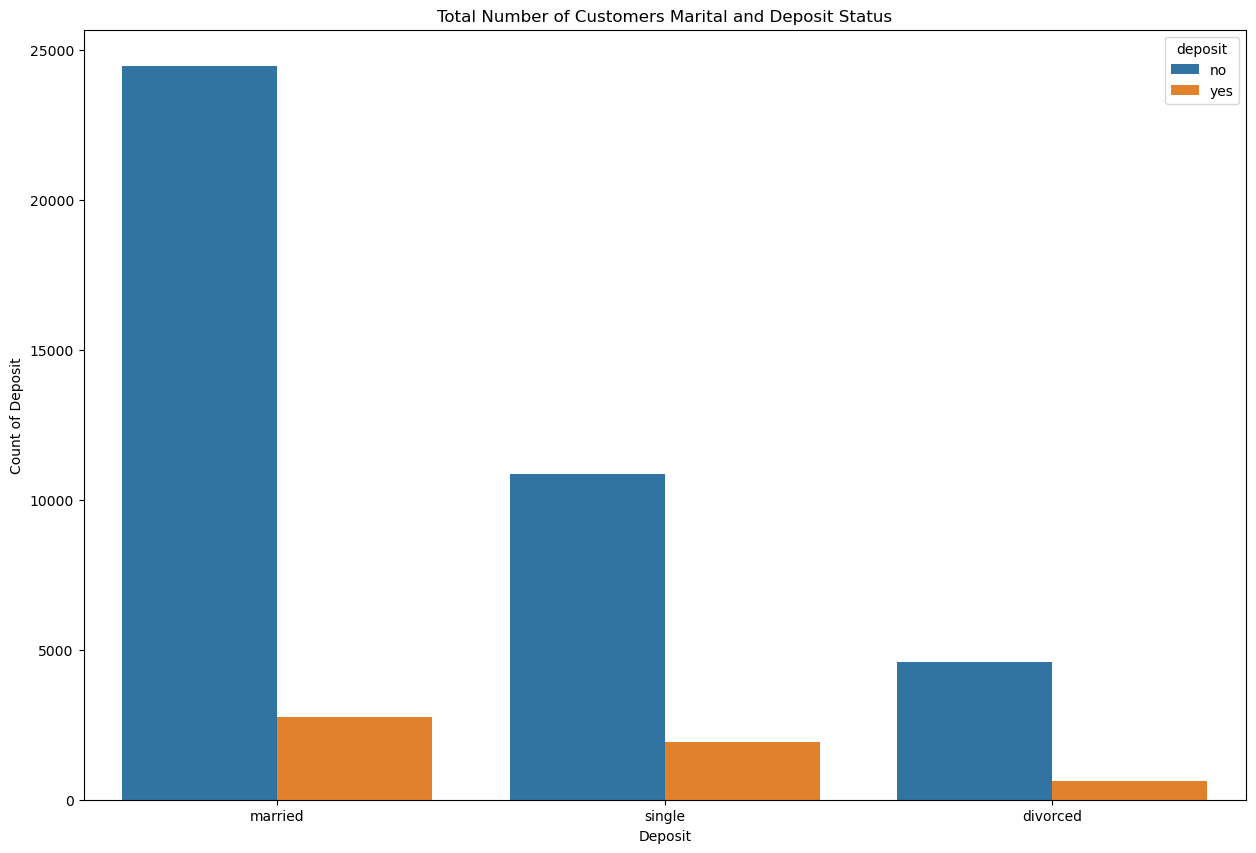

In [225]:
plt.figure(figsize=(15,10))
sns.countplot(x='marital', data=df, hue='deposit')
plt.xlabel('Deposit')
plt.ylabel('Count of Deposit')
plt.title('Total Number of Customers Marital and Deposit Status');

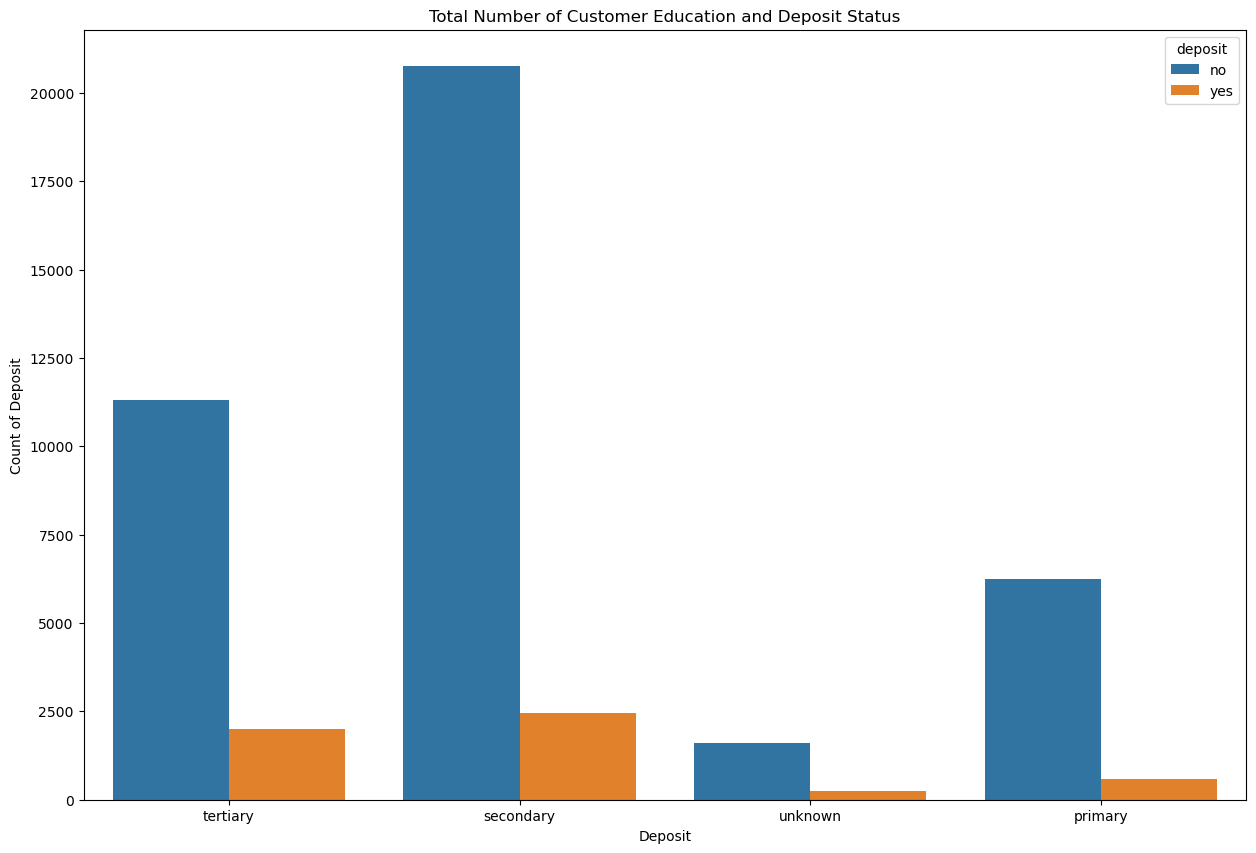

In [226]:
plt.figure(figsize=(15,10))
sns.countplot(x='education', data=df, hue='deposit')
plt.xlabel('Deposit')
plt.ylabel('Count of Deposit')
plt.title('Total Number of Customer Education and Deposit Status');

- I observed that customers with secondary education have the highest deposit, seconded by tertiary, primary and unknown.

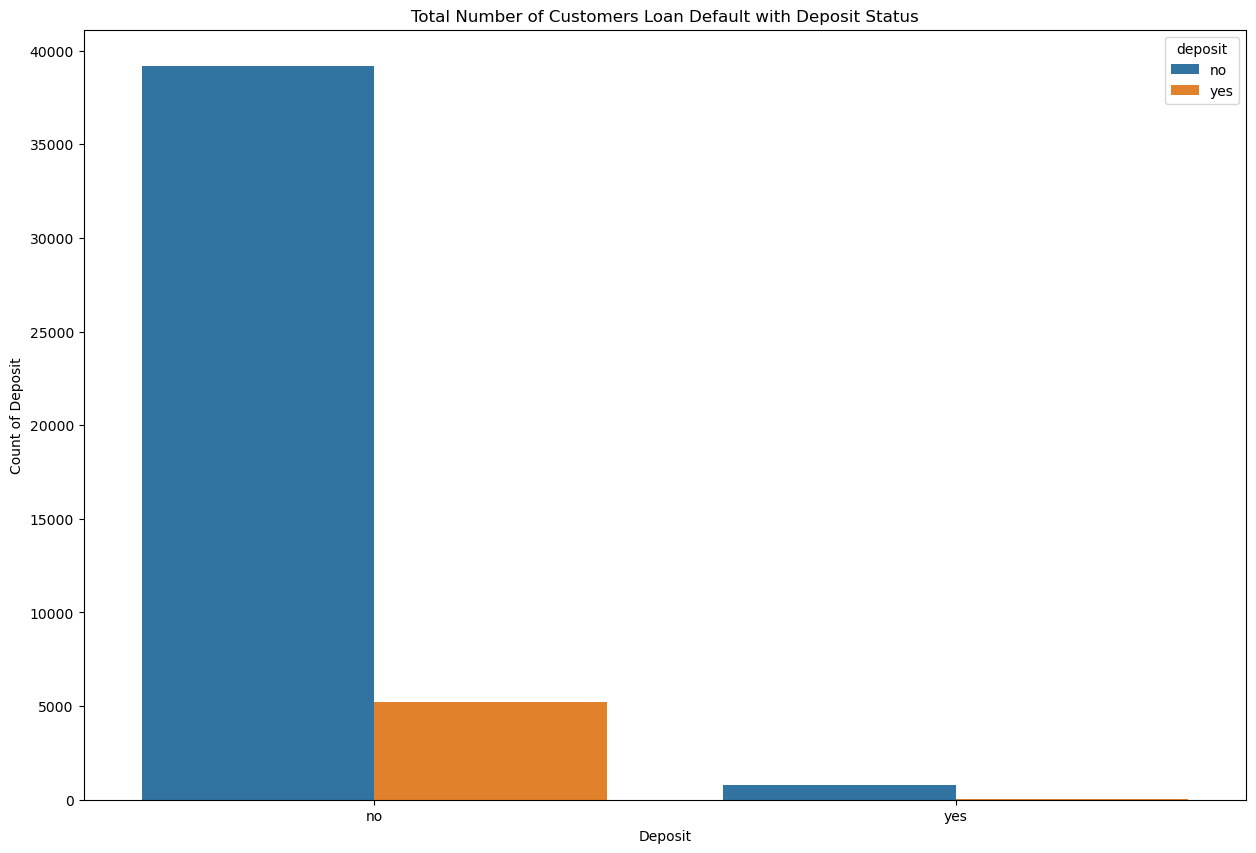

In [227]:
plt.figure(figsize=(15,10))
sns.countplot(x='default', data=df, hue='deposit')
plt.xlabel('Deposit')
plt.ylabel('Count of Deposit')
plt.title('Total Number of Customers Loan Default with Deposit Status');

- I observed that customers without deposit have very high default compared to customers with deposit.

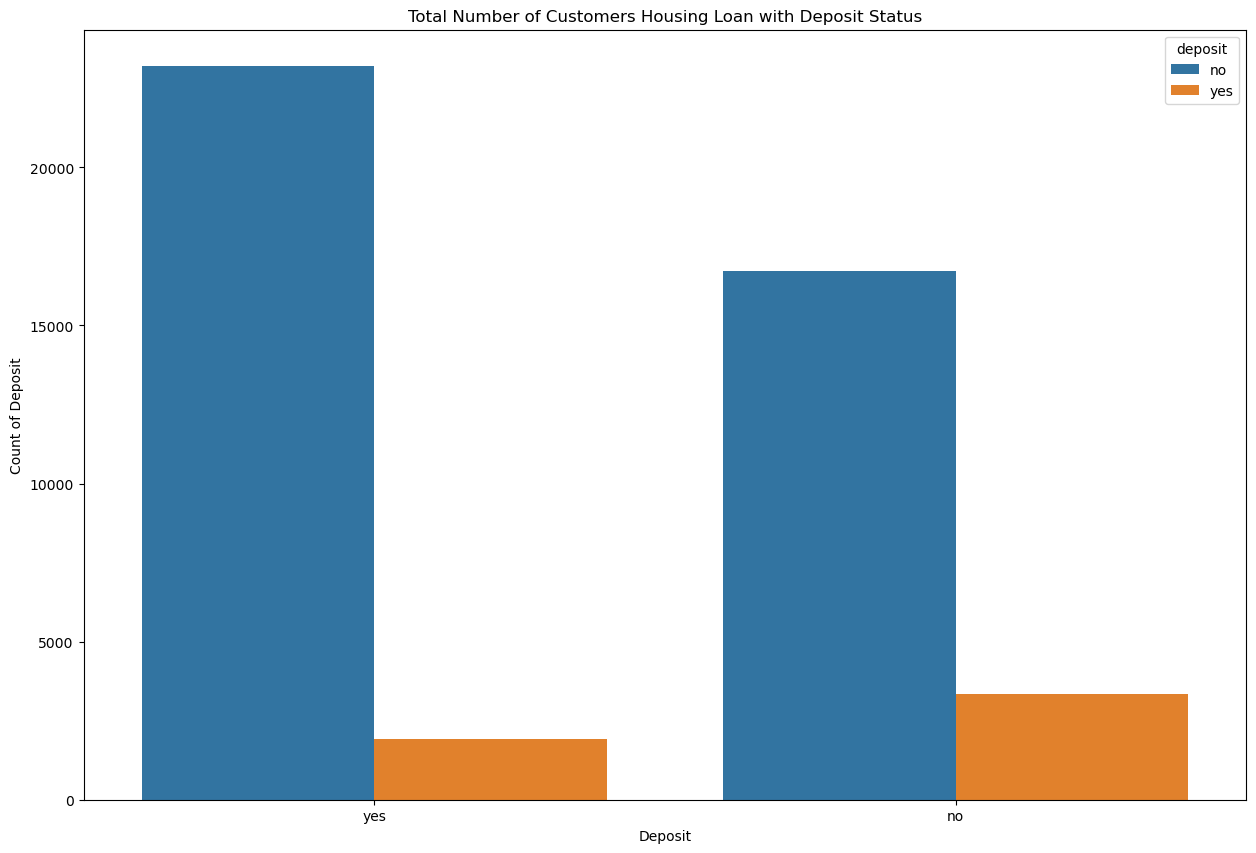

In [228]:
plt.figure(figsize=(15,10))
sns.countplot(x='housing', data=df, hue='deposit')
plt.xlabel('Deposit')
plt.ylabel('Count of Deposit')
plt.title('Total Number of Customers Housing Loan with Deposit Status');

- I observed that Customers without Housing Loans have the highest Deposit compared to Customers with Housing Loans

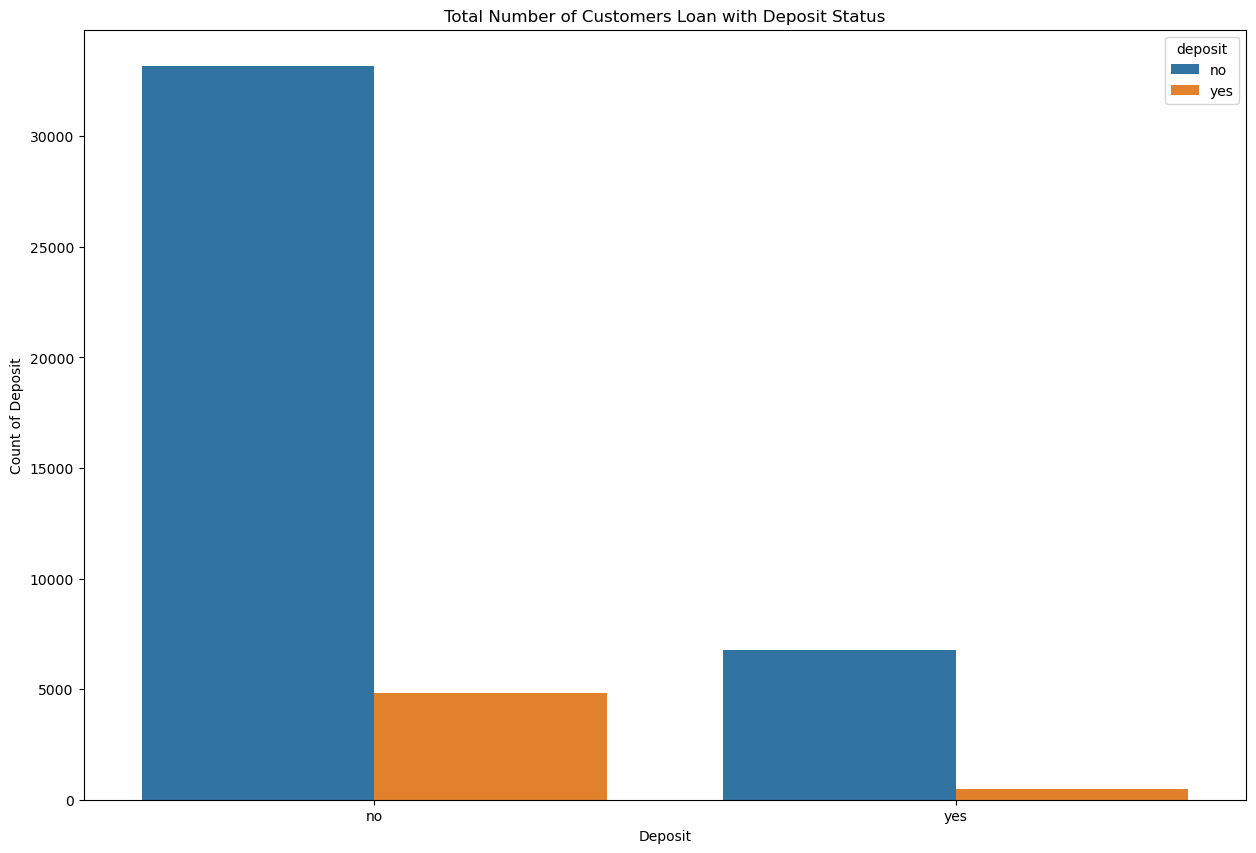

In [229]:
plt.figure(figsize=(15,10))
sns.countplot(x='loan', data=df, hue='deposit')
plt.xlabel('Deposit')
plt.ylabel('Count of Deposit')
plt.title('Total Number of Customers Loan with Deposit Status');

- I observed thatCustomers without loan has the highest deposit count compared to customers with personal loan although there are relatively a litlle about 8,000 customers with loan.

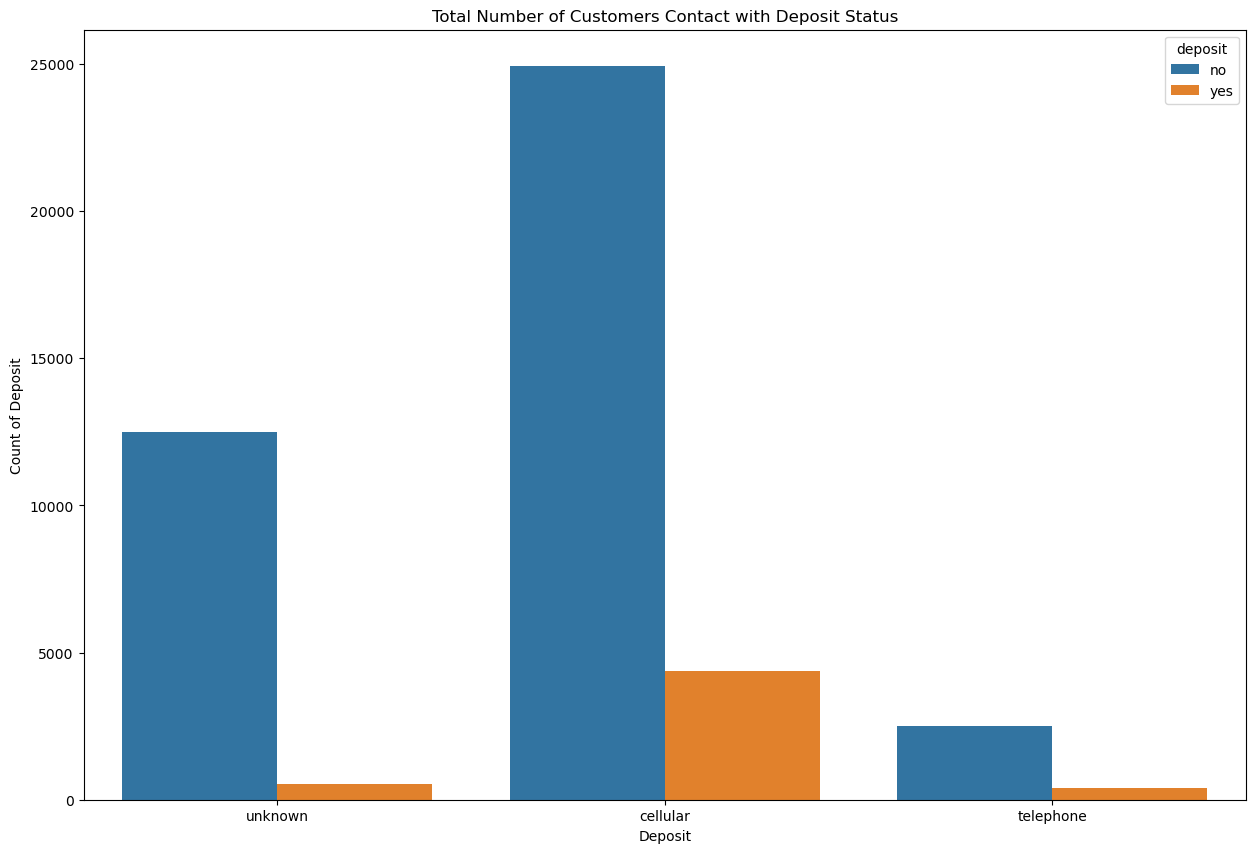

In [230]:
plt.figure(figsize=(15,10))
sns.countplot(x='contact', data=df, hue='deposit')
plt.xlabel('Deposit')
plt.ylabel('Count of Deposit')
plt.title('Total Number of Customers Contact with Deposit Status');

- I observed that Customers with cellular contact has highest deposit followed by unknown and telephone.  

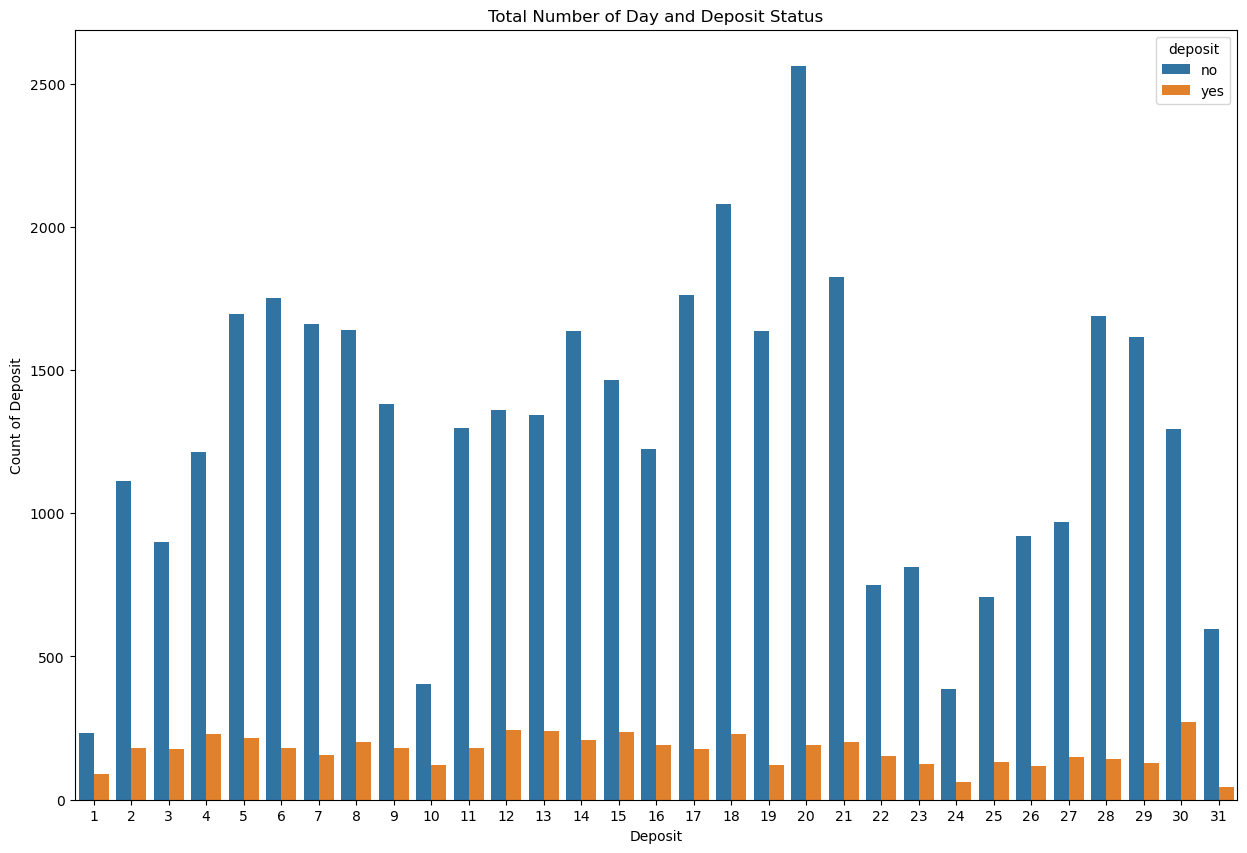

In [231]:
plt.figure(figsize=(15,10))
sns.countplot(x='day', data=df, hue='deposit')
plt.xlabel('Deposit')
plt.ylabel('Count of Deposit')
plt.title('Total Number of Day and Deposit Status');

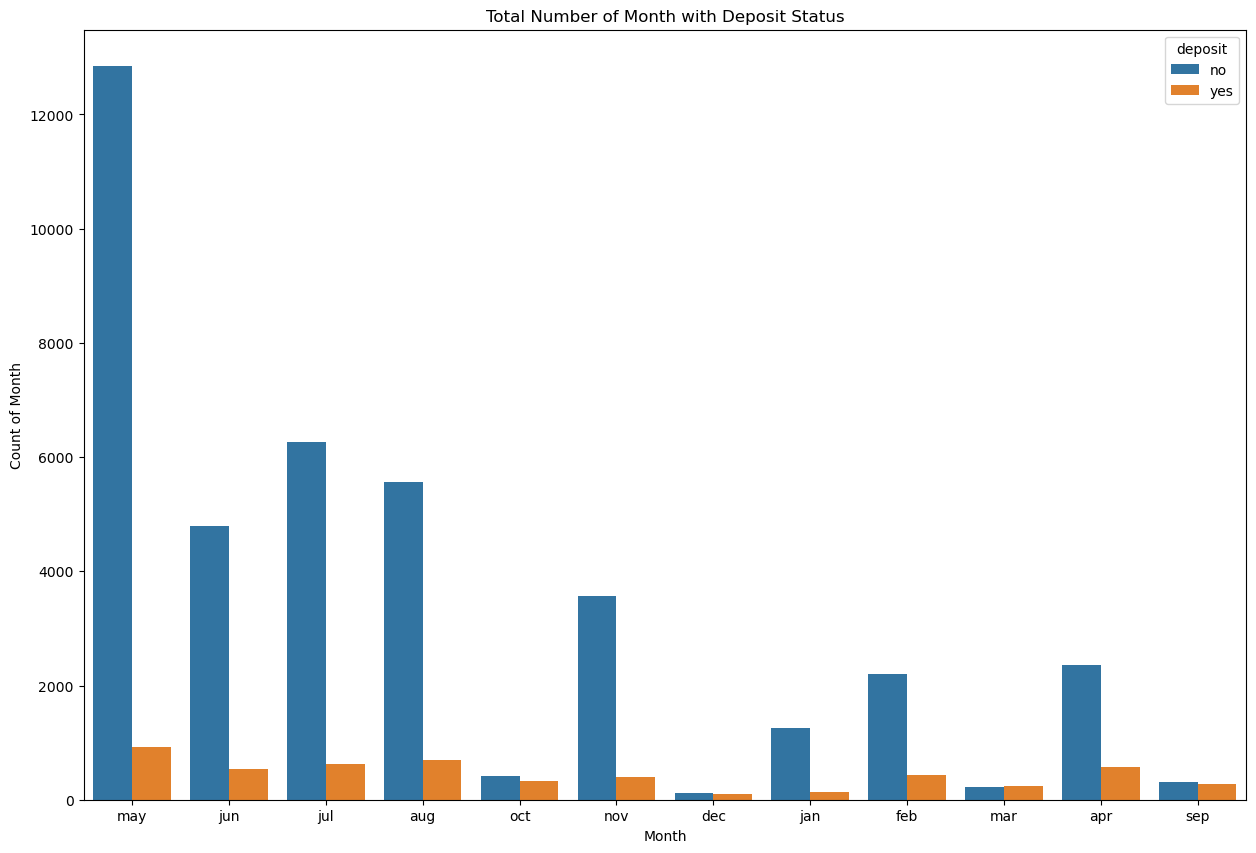

In [232]:
plt.figure(figsize=(15,10))
sns.countplot(x='month', data=df, hue='deposit')
plt.xlabel('Month')
plt.ylabel('Count of Month')
plt.title('Total Number of Month with Deposit Status');

- I observed that the count of No Deposit are in descending order of May, July, August,June, November, April, Feb, January, October, September, March and December.
- I observed that the count of Deposit are in descending order of May, August, July, April, June, Febrary, November, October, September, March, January and December.

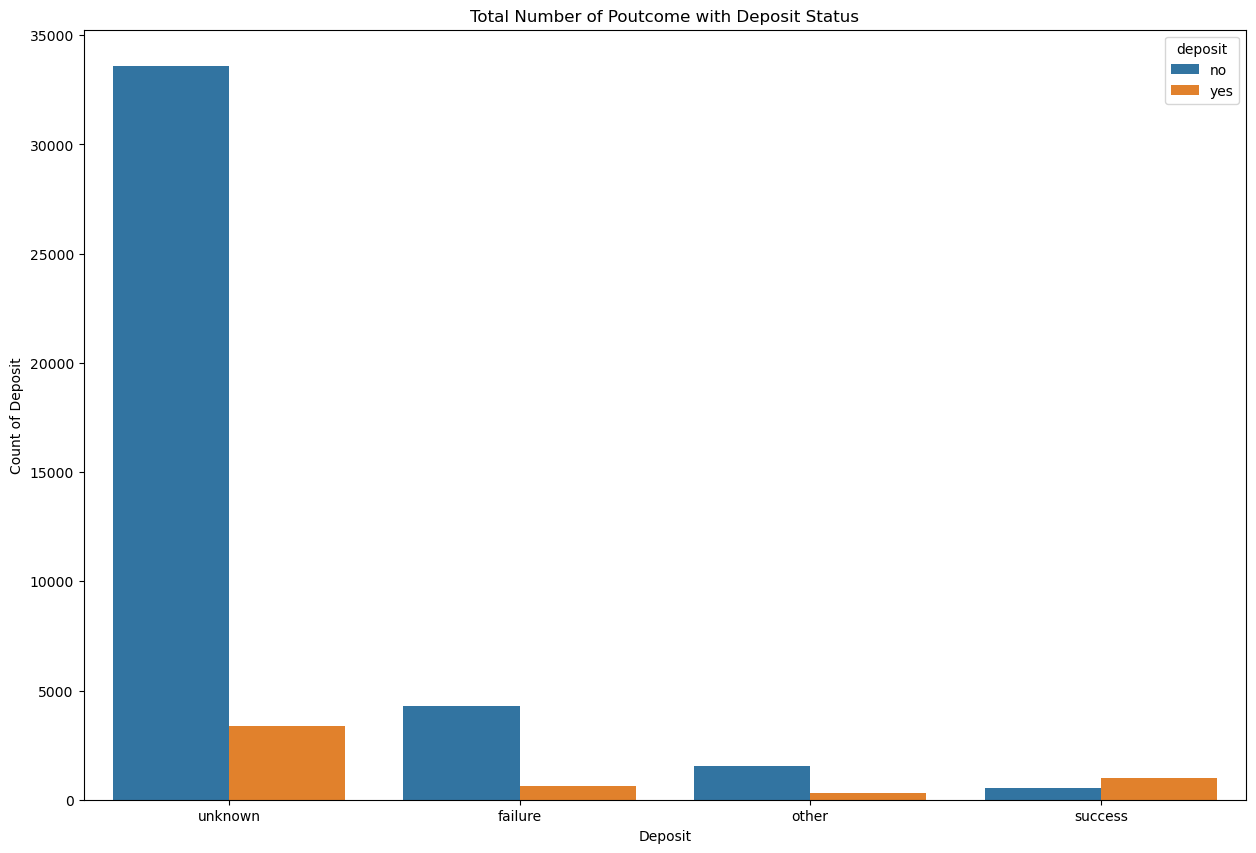

In [233]:
plt.figure(figsize=(15,10))
sns.countplot(x='poutcome', data=df, hue='deposit')
plt.xlabel('Deposit')
plt.ylabel('Count of Deposit')
plt.title('Total Number of Poutcome with Deposit Status');

- I observed that the deposit of the campaign outcomes is highest in count while others is the lowest.
- I also observed that Sucess outcome has highier deposit count from customers than NO deposit.

#### Multivariate Analysis

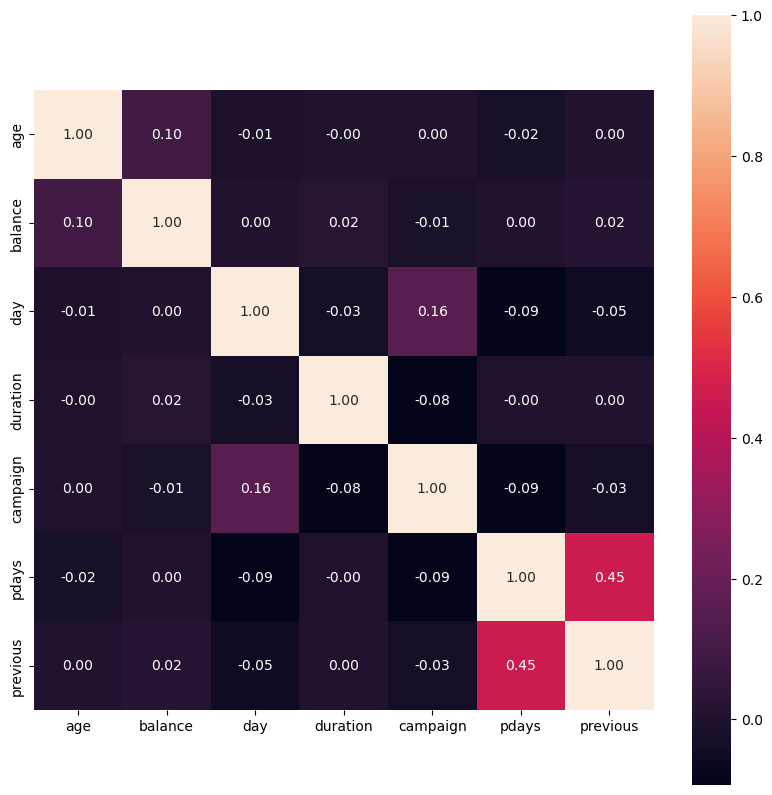

In [234]:
plt.figure(figsize=(10,10))

hm=sns.heatmap(df.corr(), cbar=True, annot=True, square=True, fmt='.2f',annot_kws={'size':10});

- Along X and Y variables I observed correlation where each variable intersects.

- ###### Age
- I observed no correlation between Age and Previous (0.00).
- I observed a negative correlation between Age and Pdays, althogh a correlation of -0.02 is almost negligible.
- I observed no correlation between Age and Campaign (0.00).
- I observed no correlation between Age and Duration (0.00).
- I observed a negative correlation between Age and Day, althogh a correlation of -0.01 is almost negligible.
- I observe a positive correltion between Age and Balance, although 0.10 cooeficient is weak.

- ###### Balance
- I observed a very minimal but positive relationship between Balance and Previous(0.02).
- I observed no correlation between Pdays and Balance(0.00).
- I observed a waek negative relationship between Campaign and Balance (-0.01).
- I observed a very minimal but positive relationship between Duration and Previous(0.02).
- I observed no correlation between Day and Balance(0.00).
- I observe a positive correltion between Age and Balance, although 0.10 cooeficient is weak.

In [ ]:
var=['age_bracket','balance','day','duration','campaign','pdays','previous']
sns.pairplot(df[var]);

## Feature Engineering/ Data Pre-processing

In [ ]:
df.head()

In [ ]:
df1 = df[['age','balance','day','duration','campaign','pdays','previous','marital','education','housing','loan','contact','month','poutcome', 'default']]
df1

In [ ]:
# Encoding selected categorical columns

#initializing the label encoder
label_encoder = LabelEncoder()

# Encoding each categorical column 
encoded_marital = label_encoder.fit_transform(df1['marital'])
encoded_education = label_encoder.fit_transform(df1['education'])
encoded_housing = label_encoder.fit_transform(df1['housing'])
encoded_loan = label_encoder.fit_transform(df1['loan'])
encoded_contact = label_encoder.fit_transform(df1['contact'])
encoded_month = label_encoder.fit_transform(df1['month'])
encoded_poutcome = label_encoder.fit_transform(df1['poutcome'])
encoded_default = label_encoder.fit_transform(df1['default'])
encoded_deposit = label_encoder.fit_transform(df['deposit'])


#Replacing the original columns
df1['marital'] = encoded_marital
df1['education'] = encoded_education
df1['housing'] = encoded_housing
df1['loan'] = encoded_loan
df1['contact'] = encoded_contact
df1['month'] = encoded_month
df1['poutcome'] = encoded_poutcome
df1['default'] = encoded_default
df['deposit'] = encoded_deposit

label = df[['deposit']]

In [ ]:
df1.head(10)

In [ ]:
label.head()

In [ ]:
# Checking the data type

df1.dtypes

# Note that we need just integer for our machine learning algorithms to work. 

In [ ]:
# Normalizing the data

scaler = MinMaxScaler()

df1['Scaled_balance'] = scaler.fit_transform(df1['balance'].values.reshape(-1,1))
df1['Scaled_duration'] = scaler.fit_transform(df1['duration'].values.reshape(-1,1))
df1['Scaled_campaign'] = scaler.fit_transform(df1['campaign'].values.reshape(-1,1))
df1['Scaled_pdays'] = scaler.fit_transform(df1['pdays'].values.reshape(-1,1))
df1['Scaled_previous'] = scaler.fit_transform(df1['previous'].values.reshape(-1,1))

df1.drop(['balance', 'duration','campaign','pdays','previous'], axis = 1, inplace = True)

df1.head(10)

## Machine Learning

In [ ]:
# Split the dataset training and testing sets - X = Questions, y = Answers

X_train, X_test, y_train, y_test = train_test_split(df1, label, test_size = 0.2, random_state = 42)

In [ ]:
X_test.head(20)

In [ ]:
y_test.head(20)

In [ ]:
# Model Building

# Logistic Regression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

ly_pred = logreg.predict(X_test)

print ("Logistic Regression")
print ("Accuracy:", accuracy_score (y_test, ly_pred))
print ("Precision:", precision_score(y_test, ly_pred))
print ("Recall:", recall_score(y_test, ly_pred))
print("F1_score:", f1_score(y_test, ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))

- In evaluating the performance of my logistic regression model, I obtained the following results:

- Accuracy: The accuracy of 0.88710 suggests that my model correctly predicted the target variable with an overall accuracy of approximately 88.7%. This metric provides an overall assessment of the model's performance, considering both true positives and true negatives.

- Precision: The precision of 0.62774 indicates that when the model predicts a positive outcome, it is correct approximately 62.7% of the time. Precision focuses on the proportion of true positives out of all positive predictions, and a higher precision value indicates a lower rate of false positives.

- Recall: The recall of 0.15765 suggests that the model identifies only 15.7% of all true positive instances correctly. Recall, also known as sensitivity or true positive rate, measures the proportion of actual positive instances that are correctly identified by the model.

- F1_score: With an F1 score of 0.25201, the model achieved a relatively low score, indicating that there might be challenges in correctly identifying both positive and negative instances. It suggests that the model may struggle with finding a balance between precision and recall.

- AUC-ROC: The AUC-ROC value of 0.57241 represents the area under the Receiver Operating Characteristic curve. This curve is a graphical representation of the trade-off between true positive rate (sensitivity) and false positive rate (1 - specificity). An AUC-ROC of 0.57241 suggests a modest performance, indicating that the model's ability to discriminate between positive and negative instances is slightly better than random chance.

In [ ]:
# Creating a confusion matrix

lcm = confusion_matrix(y_test, ly_pred)

# Visualize the confsion matrix

sns.heatmap(lcm, annot = True, cmap = 'Blues', fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

- True Positives (TP): These are the instances where the model correctly predicted the positive class. (1,1=(172))
- True Negatives (TN): These are the instances where the model correctly predicted the negative class. (0,0=(7850))
- False Positives (FP): These are the instances where the model incorrectly predicted the positive class.(0,1=(102))
- False Negatives (FN): These are the instances where the model incorrectly predicted the negative class. (1,0=(919))

In [ ]:
# Random Forest Classifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfy_pred = rfc.predict(X_test)

print ("Random Classifier")
print ("Accuracy:", accuracy_score (y_test, ly_pred))
print ("Precision:", precision_score(y_test, ly_pred))
print ("Recall:", recall_score(y_test, ly_pred))
print("F1_score:", f1_score(y_test, ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))

-  In evaluating the performance of my randdom forest classifier model, I obtained the following results:

- Accuracy: an accuracy of 0.88710 suggests that my model correctly predicted the class labels for a significant portion of the data, indicating its overall effectiveness.

- Precision: this measures the proportion of correctly predicted positive instances out of all predicted positive instances, was found to be 0.628. Conclusively when my model predicted a positive outcome, it was correct about 62.8% of the time.

- Recall: also known as sensitivity, was calculated to be 0.158. This means that my model was able to correctly identify only 15.8% of the actual positive instances in the dataset.

- F1_score: combines precision and recall, was determined to be 0.252. This metric provides an overall assessment of my model's ability to balance precision and recall.

- AUC-ROC: The AUC-ROC value of 0.57241 represents the area under the Receiver Operating Characteristic curve. This metric measures my model's performance across various classification thresholds, indicating that my model performs slightly better than random chance.

In [ ]:
rcm = confusion_matrix(y_test, rfy_pred)

# Visualize the confsion matrix

sns.heatmap(rcm, annot = True, cmap = 'Blues', fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

- True Positives (TP): These are the instances where the model correctly predicted the positive class. (1,1=(441))
- True Negatives (TN): These are the instances where the model correctly predicted the negative class. (0,0=(7705))
- False Positives (FP): These are the instances where the model incorrectly predicted the positive class.(0,1=(247))
- False Negatives (FN): These are the instances where the model incorrectly predicted the negative class. (1,0=(643))

## Conclusion

At Nexus bank, the primary concern is to minimize the number of loan defaults, increase deposits and mitigate risks effectively. False negatives can lead to financial losses for the bank and potentially impact customer satisfaction and trust.

By focusing on minimizing false negatives, the bank can take proactive measures to prevent loan defaults, such as implementing stricter lending criteria, conducting additional risk assessments, or offering appropriate financial assistance to at-risk customers. Minimizing false negatives helps in identifying and addressing potential risks early on, reducing the likelihood of loan defaults and associated financial consequences.

However, it's important to note that the specific objectives and priorities of the bank should also be considered. For example, if the bank's primary goal is to attract new customers and increase deposits, the emphasis might be more on true positives (identifying customers likely to make deposits) to optimize marketing and customer acquisition strategies.

Therefore, it is crucial to strike a balance between identifying potential risks (minimizing false negatives) and identifying opportunities (maximizing true positives) based on the specific goals, risk tolerance, and operational context of the bank.

